<a href="https://colab.research.google.com/github/dhee061/Dashboards-Reports/blob/main/SuperKart_Sales_Revenue_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [1]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 17.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
diffusers 0.36.0 requires huggingface-hub<2.0,>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.
transformers 4.57.6 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.
gradio 5.50.0 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.30.1 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you hav

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

from joblib import Memory
memory = Memory(location="cache", verbose=0)

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To transforming the target variable
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import clone

# To serialize the model
import joblib

# os related functionalities
import os
from getpass import getpass

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi, create_repo

# for generating UTC timestamps
from datetime import date, datetime, timezone

# **Loading the dataset**

In [3]:
# Mounting drive on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the SuperKart dataset CSV from Google Drive into a pandas DataFrame
kart = pd.read_csv("/content/drive/MyDrive/Great Learning/7. Model Deployment/Project: Model Deployment: SuperKart/SuperKart.csv")

In [5]:
# copying data to another variable to avoid any changes to original data
data = kart.copy()

# **Data Overview**

In [6]:
# Preview the first 5 rows of the dataset
data.head(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [7]:
# Preview the last 5 rows of the dataset
data.tail(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


**Comment:**
- I quickly inspect a few sample rows at the top and bottom to confirm column names, data types, and see if there are any immediately obvious issues.

In [8]:
# Display the number of rows and columns in the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 8763 rows and 12 columns.


**Comment:**
- The dataset has 8763 rows and 12 columns.

In [9]:
# DataFrame info: dtypes, non-null counts, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Comment:**
- There are no missing values in the dataset, every column shows 8,763 non-null entries.
- There are 4 float, 1 int numeric, and 7 object (categorical) data types.

In [10]:
# Summary statistics for all columns
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment:**
- Numeric summary shows avg sales ≈ 3,464 (min 33, max 8,000); avg weight 12.65 and allocated area 0.069. Categorical breadth: 16 product types (top Fruits and Vegetables), 4 store types (top Supermarket Type 2), 3 sizes (Medium most), 3 city tiers (Tier 2 most), and 4 stores (top OUT004); sugar content 4 levels (Low Sugar most).

In [11]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

**Comment:**
- No duplicate records found in dataset.

In [12]:
# checking for missing values in the data
data.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


**Comment:**
- No missing values — every column has 0 nulls. Data completeness is 100%.

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

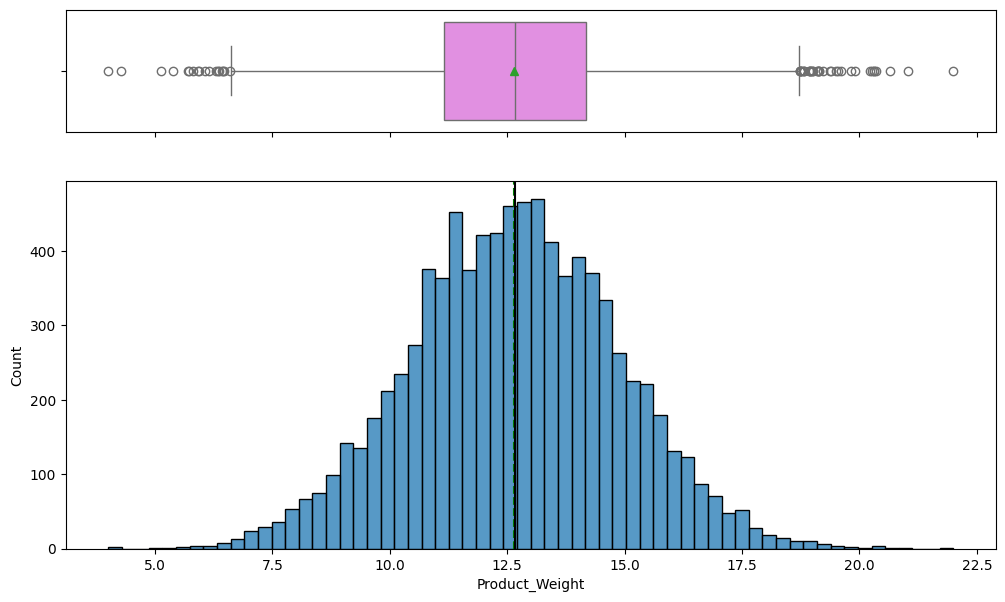

In [14]:
# Histogram and boxplot for Product_Weight
histogram_boxplot(data, "Product_Weight")

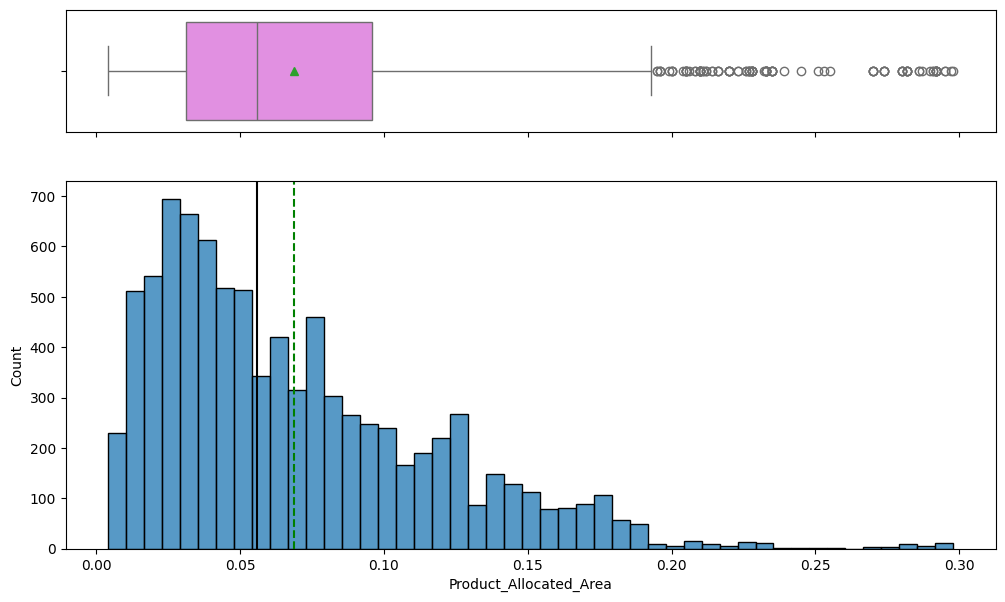

In [15]:
# Histogram and boxplot for Product_Allocated_Area
histogram_boxplot(data, "Product_Allocated_Area")

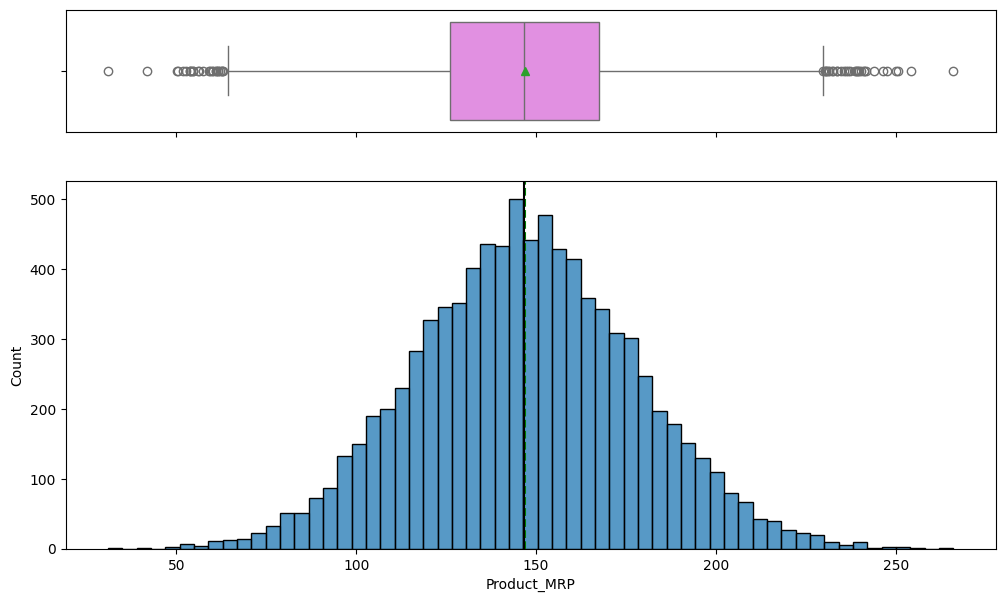

In [16]:
# Histogram and boxplot for Product_MRP
histogram_boxplot(data, "Product_MRP")

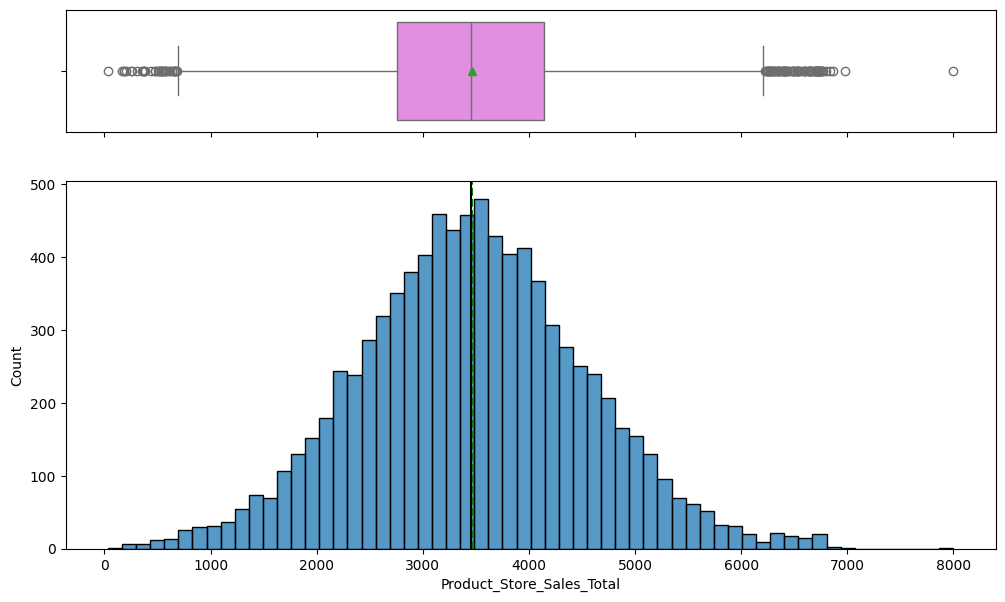

In [17]:
# Histogram and boxplot for Product_Store_Sales_Total
histogram_boxplot(data, "Product_Store_Sales_Total")

**Comment:**
* **Product\_Weight**

  * Roughly bell-shaped around **\~12.5**; range \~**4–22**.
  * A few low/high **outliers** visible in the boxplot.

* **Product\_Allocated\_Area**

  * Strong **right-skew**; most values in **0.03–0.10**, tail up to **\~0.30**.
  * Many high-end **outliers** → consider log/winsorization if needed.

* **Product\_MRP**

  * Near-normal distribution centered **\~150**; range **\~31–260**.
  * Minor outliers on both sides; slight right skew.

* **Product\_Store\_Sales\_Total (target)**

  * Approximately bell-shaped with mild **right skew**, center **\~3,500–3,700**.
  * Some extreme values at both tails (low < **500**, high > **6,500–8,000**).


In [18]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

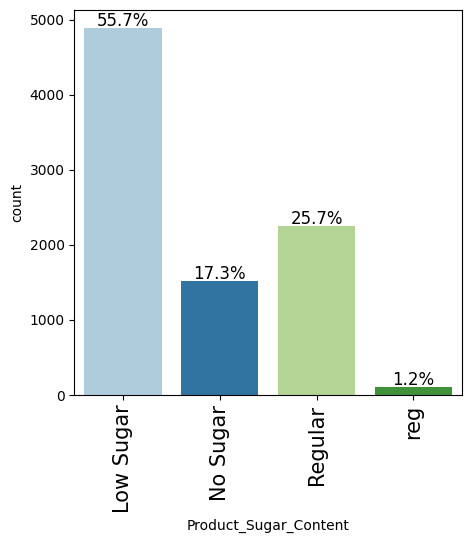

In [19]:
# Labeled bar plot of Product_Sugar_Content (percentages)
labeled_barplot(data, "Product_Sugar_Content", perc=True)

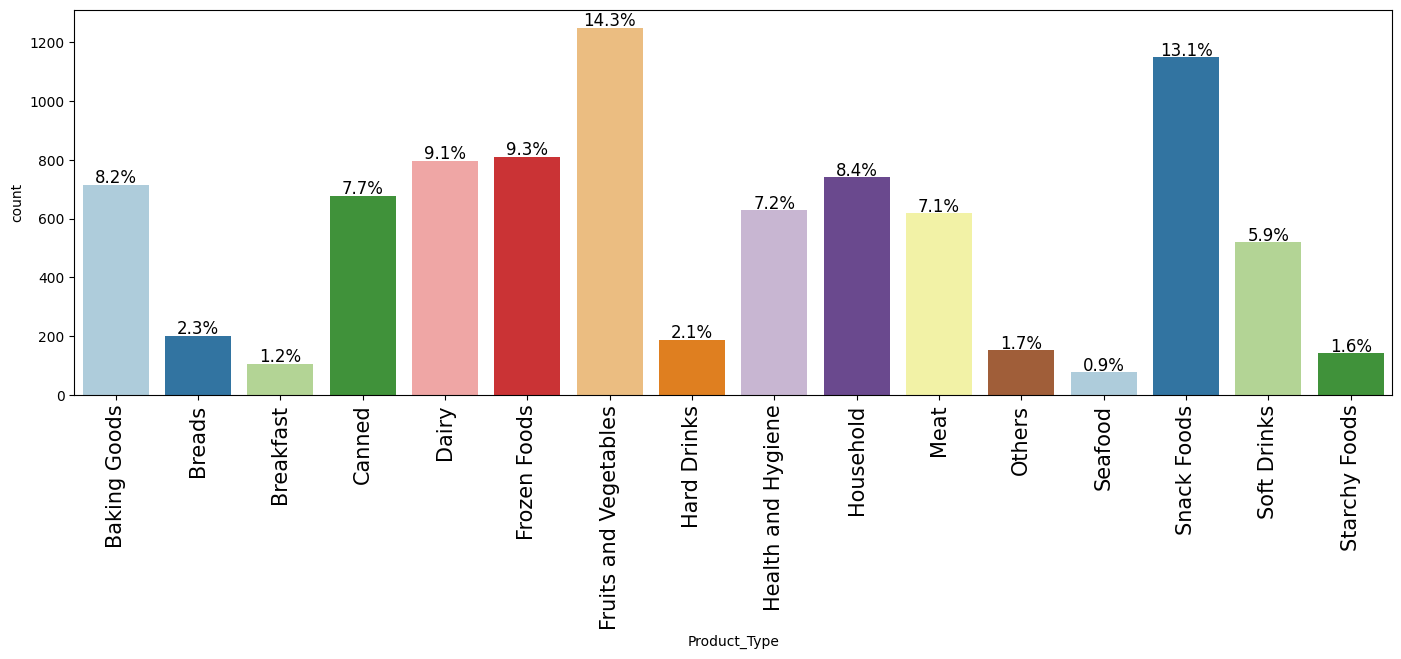

In [20]:
# Labeled bar plot of Product_Type (percentages)
labeled_barplot(data, "Product_Type", perc=True)

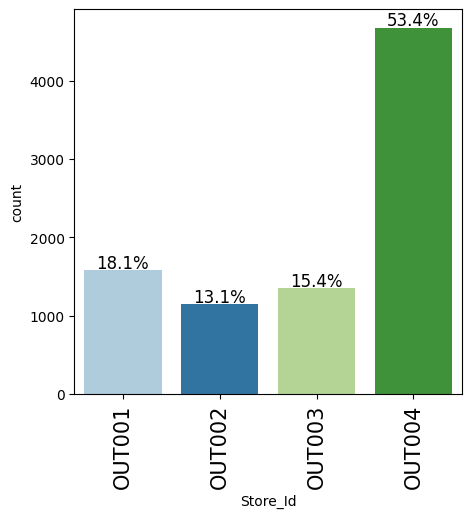

In [21]:
# Labeled bar plot of Store_Id
labeled_barplot(data, "Store_Id", perc=True)

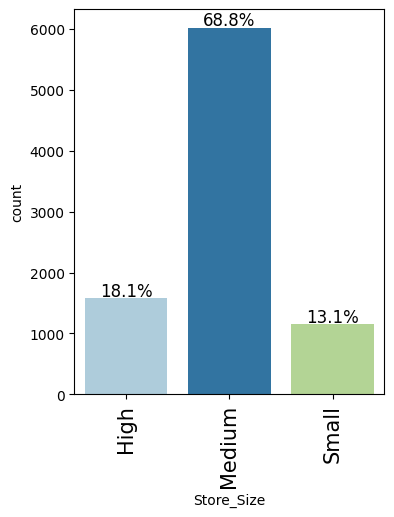

In [22]:
# Labeled bar plot of Store_Size (percentages)
labeled_barplot(data, "Store_Size", perc=True)

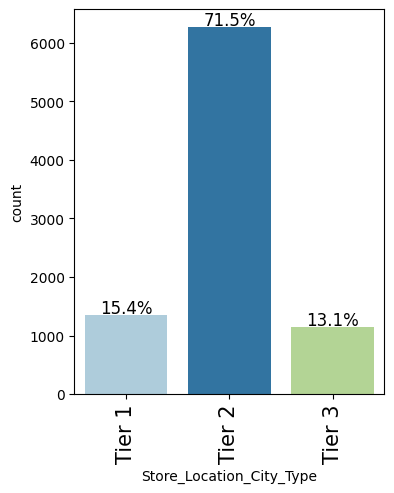

In [23]:
# Labeled bar plot of Store_Location_City_Type (percentages)
labeled_barplot(data, "Store_Location_City_Type", perc=True)

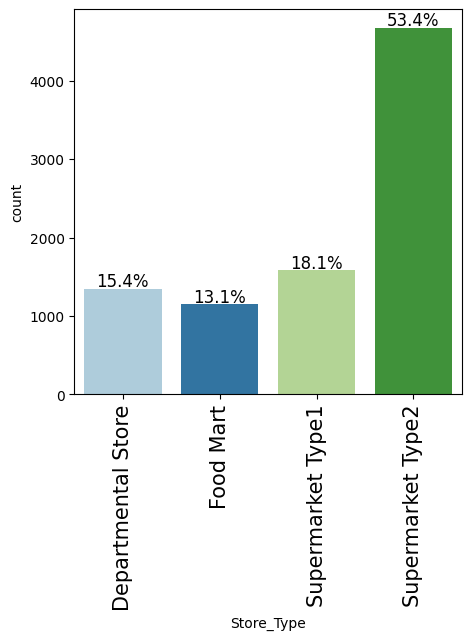

In [24]:
# Labeled bar plot of Store_Type (percentages)
labeled_barplot(data, "Store_Type", perc=True)

**Comment:**

* **Product\_Sugar\_Content:** *Low Sugar* dominates (**55.7%**), followed by *Regular* (**25.7%**) and *No Sugar* (**17.3%**). Tiny **“reg” (1.2%)** looks like a typo → merge with *Regular*.

* **Product\_Type:** Diverse mix; **Fruits & Vegetables (14.3%)** and **Snack Foods (13.1%)** lead. Small tails like **Seafood (0.9%)** and **Breakfast (1.2%)**.

* **Store\_Id:** Strong imbalance—**OUT004** accounts for **53.4%** of records; others: OUT001 **18.1%**, OUT003 **15.4%**, OUT002 **13.1%**.

* **Store\_Size:** **Medium** stores dominate (**68.8%**), with **High 18.1%** and **Small 13.1%**.

* **Store\_Location\_City\_Type:** Mostly **Tier 2** (**71.5%**); **Tier 1 15.4%**, **Tier 3 13.1%** → potential city-tier skew.

* **Store\_Type:** **Supermarket Type 2** majority (**53.4%**), then **Type 1 18.1%**, **Departmental Store 15.4%**, **Food Mart 13.1%**.


## Bivariate Analysis

### **Correlation Matrix**

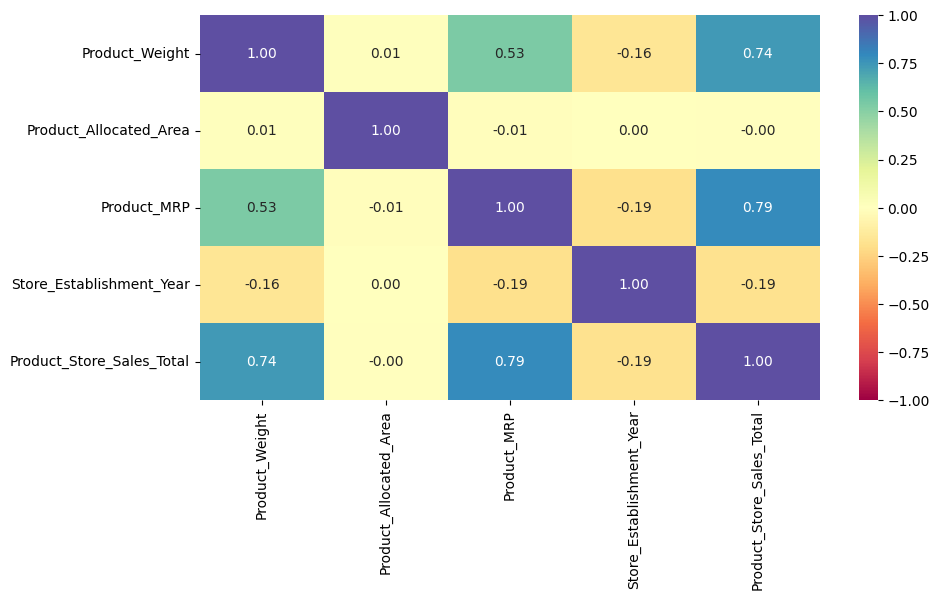

In [25]:
# Correlation heatmap of numeric features

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Comment:**

* **Strong positive links to Sales:** `Product_MRP (0.79)` and `Product_Weight (0.74)` are the top drivers.
* **Weak/none:** `Product_Allocated_Area` ≈ **0** correlation with Sales.
* **Slight negative:** `Store_Establishment_Year` has small **−0.19** correlation with Sales.
* **Feature inter-correlation:** `Product_Weight` and `Product_MRP` are moderately correlated (**0.53**).
* Implication: tree-based models should handle this fine; linear models may need regularization.

### **Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

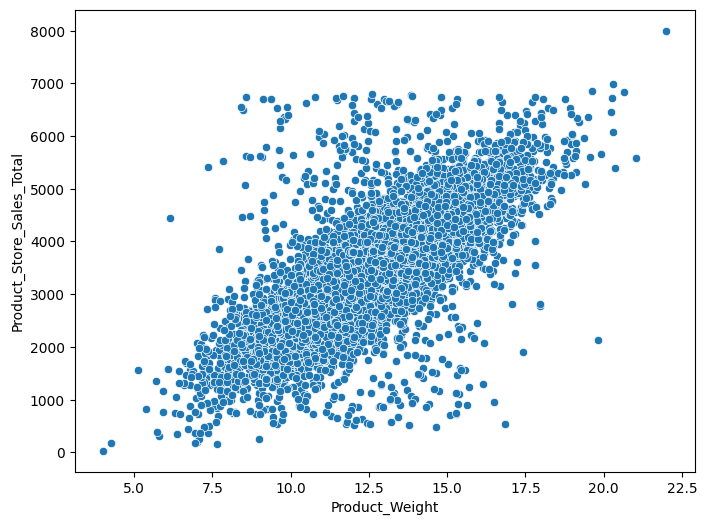

In [26]:
# Scatter plot: Product_Weight vs Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Weight, y=data.Product_Store_Sales_Total)
plt.show()

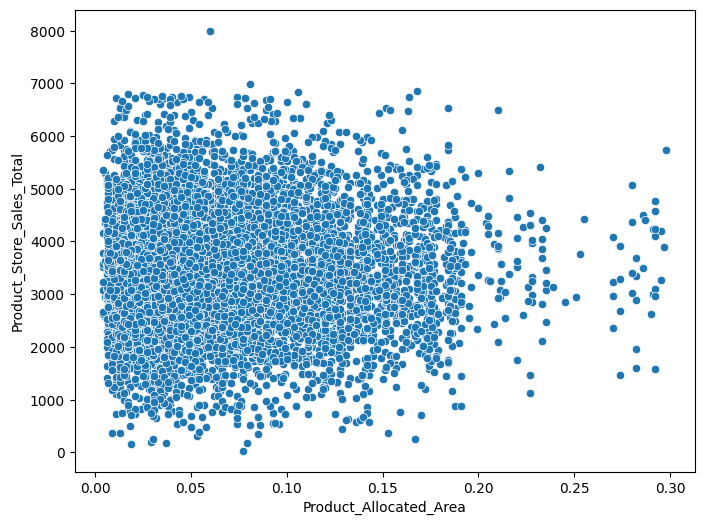

In [27]:
# Scatter plot: Product_Allocated_Area vs Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
sns.scatterplot(x="Product_Allocated_Area", y="Product_Store_Sales_Total", data=data)
plt.show()

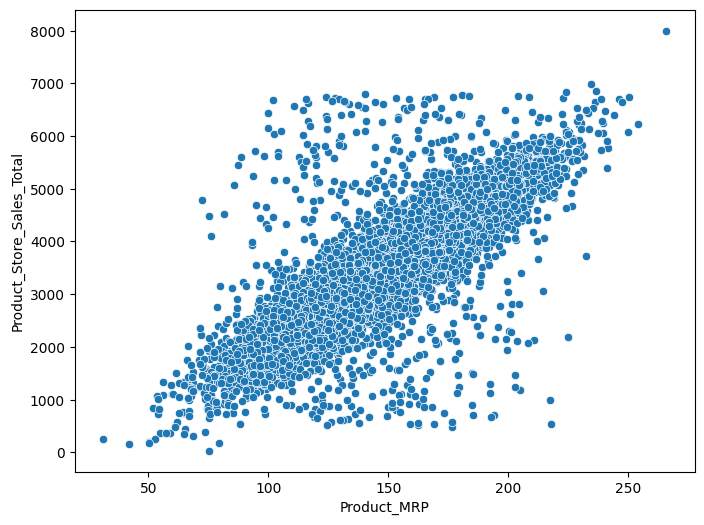

In [28]:
# Scatter plot: Product_MRP vs Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
sns.scatterplot(x="Product_MRP", y="Product_Store_Sales_Total", data=data)
plt.show()

**Comment:**

* **Product\_Weight → Sales:** Clear **positive linear trend**; higher weights associate with higher sales. Variance widens at the high end (some outliers).
* **Product\_Allocated\_Area → Sales:** **No strong relationship**—points look like a cloud; weak signal at best.
* **Product\_MRP → Sales:** Strong **positive association**; roughly linear with some high-MRP heteroscedasticity and a few outliers.


### **Let us see from which product type the company is generating most of the revenue**

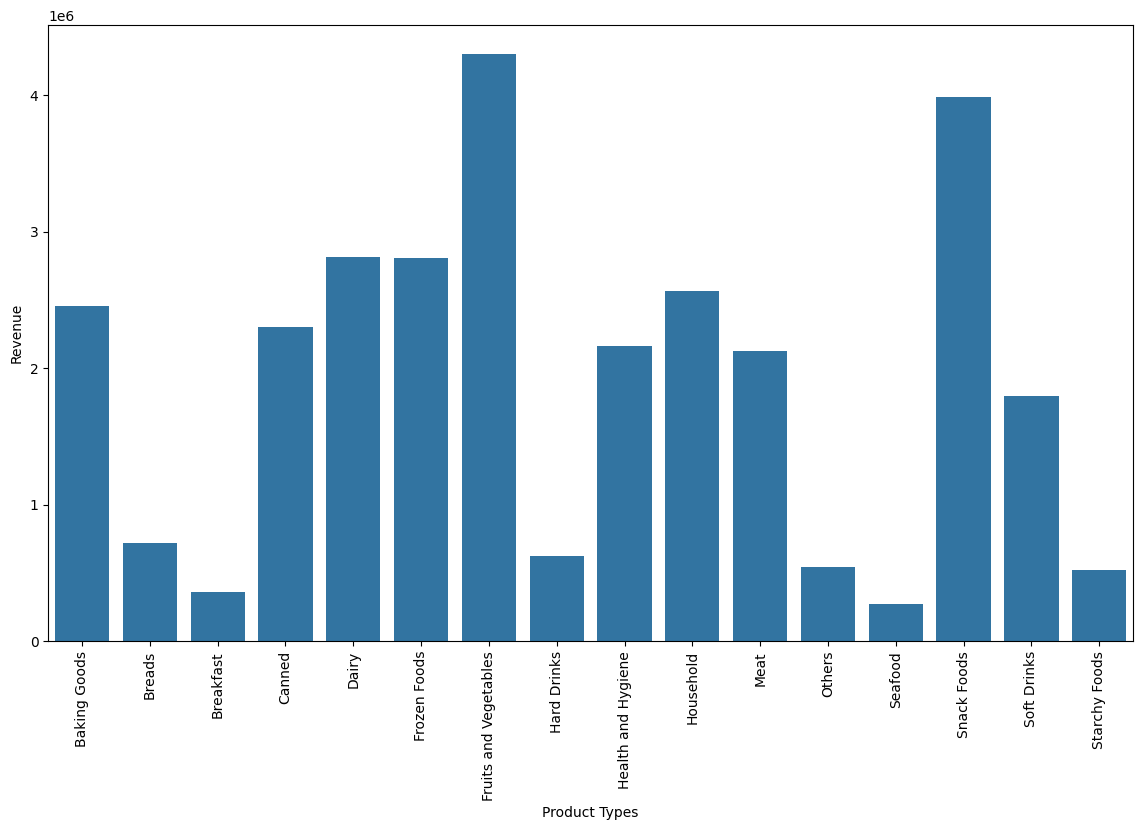

In [29]:
# Plot total revenue by product type
df_revenue1 = data.groupby(["Product_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.Product_Type, y=df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

**Comment:**

* **Top revenue drivers:** *Fruits & Vegetables* and *Snack Foods* lead by a clear margin (≈ **4.3–4.5M** each).
* **Mid-tier revenue:** *Dairy*, *Frozen Foods*, *Household*, *Baking Goods*, *Canned*, *Health & Hygiene*, and *Meat* (≈ **2.1–2.8M** range).
* **Low contributors:** *Soft Drinks* (\~**1.8M**), and notably lower tails—*Breads*, *Hard Drinks*, *Others*, *Starchy Foods*, *Breakfast*, *Seafood* (< **1M**).

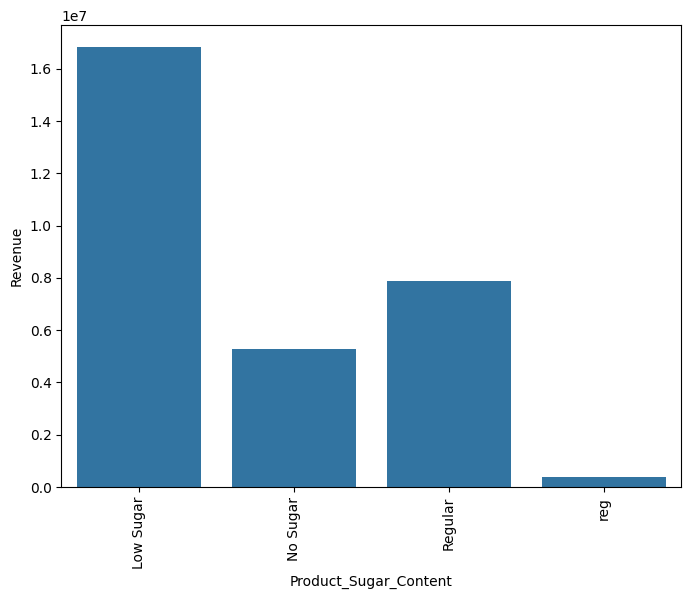

In [30]:
# Plot total revenue by Product_Sugar_Content
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()  # group by sugar content and sum revenue

plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
b = sns.barplot(
    x=df_revenue2.Product_Sugar_Content,
    y=df_revenue2.Product_Store_Sales_Total
)
b.set_xlabel("Product_Sugar_Content")
b.set_ylabel("Revenue")
plt.show()


**Comment:**

* **Low Sugar** drives the most revenue (≈ **16–17M**), consistent with its dominance in volume.
* **Regular** contributes next (\~ **7–8M**), while **No Sugar** is lower (\~ **5M**).
* Tiny **“reg”** bar is likely a mislabeled **Regular** entry — **clean/merge** this category.
* Note: categories are imbalanced; for fair comparison also check **revenue per item/record** by sugar type.


### **Let us see from which type of stores and locations the revenue generation is more**.

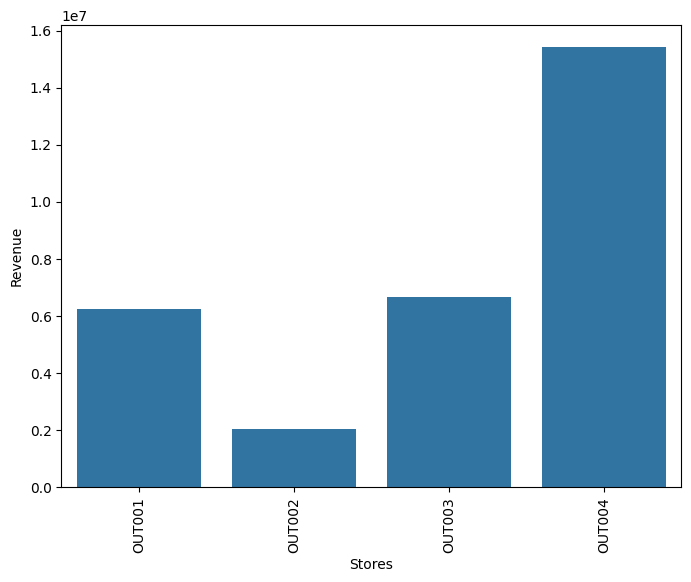

In [31]:
# Plot total revenue by store
df_store_revenue = data.groupby(["Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()  # group by store and sum revenue

plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
r = sns.barplot(
    x=df_store_revenue.Store_Id,
    y=df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()


**Comment:**

* **OUT004 dominates** revenue (\~**15–16M**), contributing the bulk of sales across stores.
* **OUT002 underperforms** (\~**2M**) relative to OUT001/OUT003 (\~**6–7M** each).
* Action: investigate drivers (store size, location tier, assortment) and consider **per-store normalization** (revenue per SKU/customer) to compare efficiency.

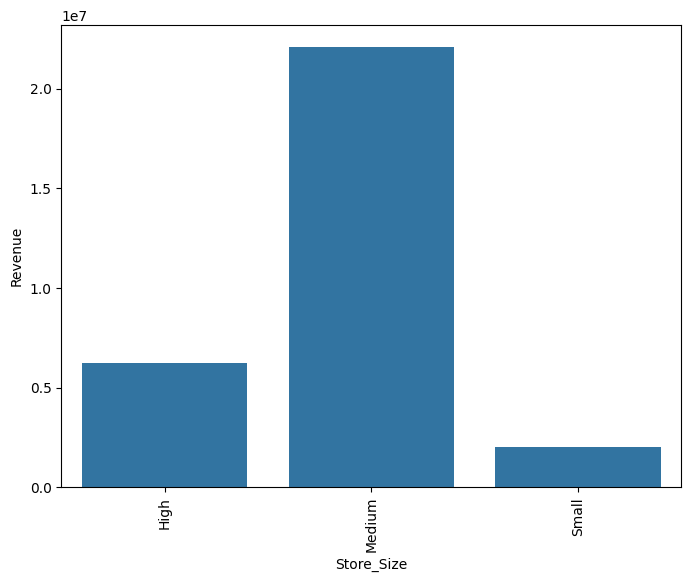

In [32]:
# Plot total revenue by Store_Size
df_revenue3 = data.groupby(["Store_Size"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()  # group by store size and sum revenue

plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
c = sns.barplot(
    x=df_revenue3.Store_Size,
    y=df_revenue3.Product_Store_Sales_Total
)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()


**Comment:**

* **Medium stores generate the majority of revenue (~22M)**, far above other sizes—likely because most outlets are medium-sized.
* **High stores contribute a mid-tier share (~6–7M)**, while **Small stores are minimal (~2M)**.
* Interpret with care: this is **total revenue**, not normalized. For fair comparison, also review **revenue per store / per sq. ft.** across sizes.


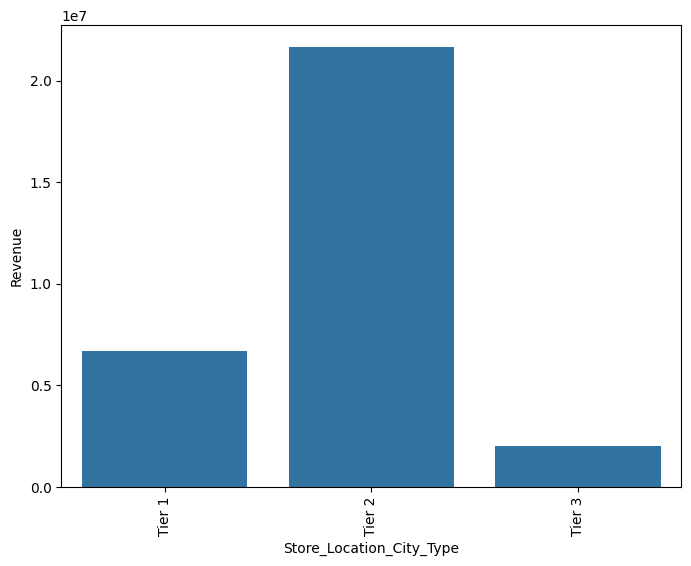

In [33]:
# Plot total revenue by Store_Location_City_Type
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()  # group by city type and sum revenue

plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
d = sns.barplot(
    x=df_revenue4.Store_Location_City_Type,
    y=df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

**Comment:**

* **Tier 2 cities contribute the bulk of revenue (~22M+)**, far exceeding other tiers.
* **Tier 1 is a distant second**, and **Tier 3 is minimal**. Since this is **total** revenue, the pattern may reflect **more stores in Tier 2**—consider normalizing by store count to compare productivity.

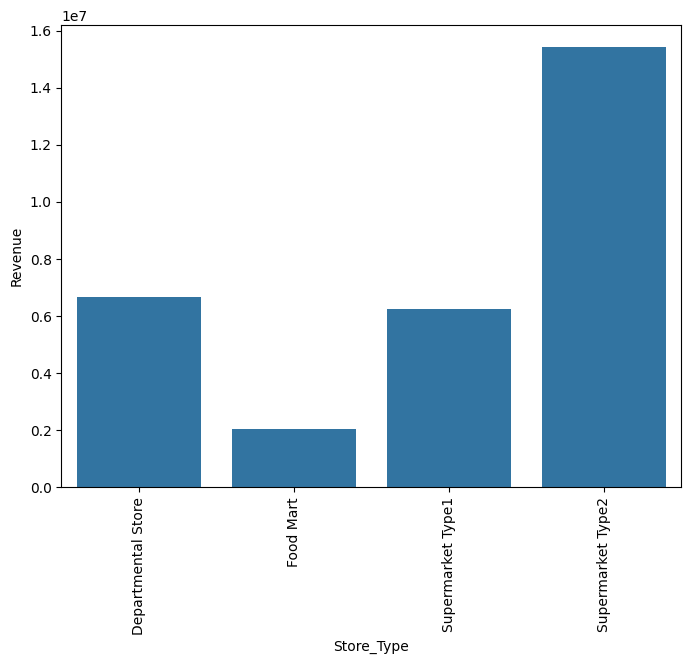

In [34]:
# Plot total revenue by Store_Type
df_revenue5 = data.groupby(["Store_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()  # group by store type and sum revenue

plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
e = sns.barplot(
    x=df_revenue5.Store_Type,
    y=df_revenue5.Product_Store_Sales_Total
)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

**Comment:**

* **Supermarket Type 2 drives the most revenue (~15–16M)** — clear leader among store formats.
* **Food Mart contributes the least (~2M)**; consider optimization or repositioning.
* **Departmental Store (6.7M) and Supermarket Type 1 (~6.2M) are mid-tier and comparable.**
* Since values are totals, **normalize by number of outlets per type** to compare productivity per store.


### **Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

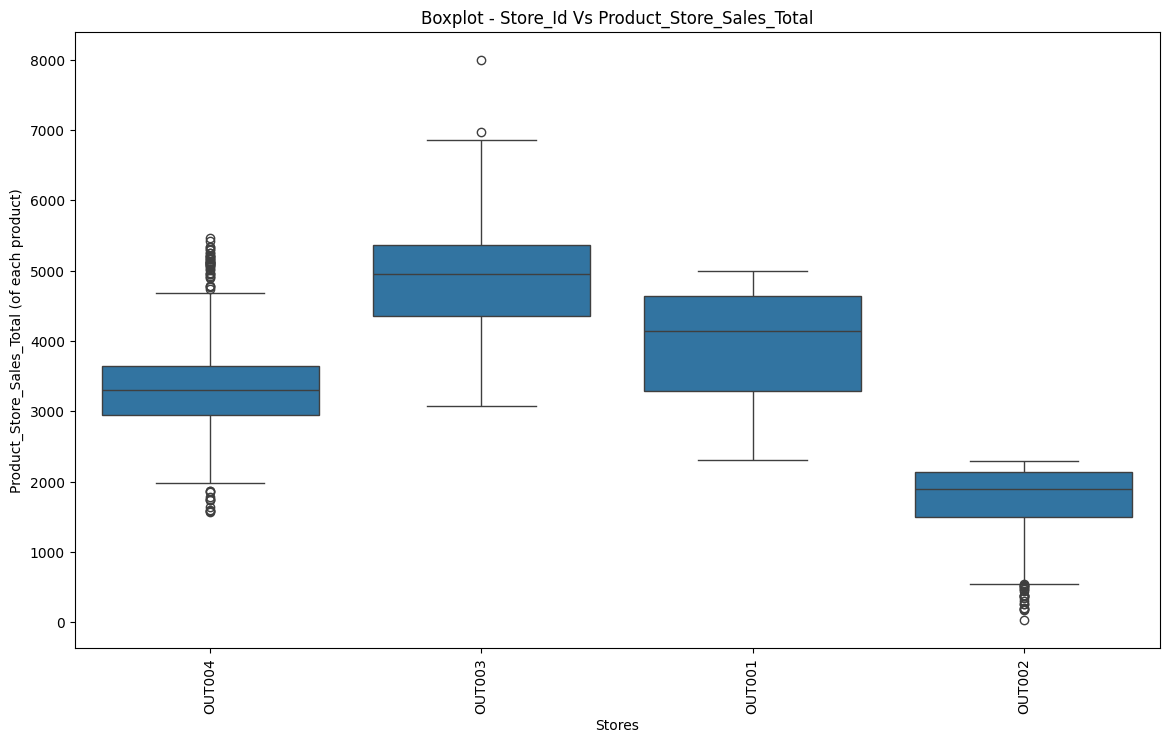

In [35]:
# Boxplot of Product_Store_Sales_Total distribution across stores
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Id", y="Product_Store_Sales_Total")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Comment:**

* **Sales level by store:** Median product-level sales rank ≈ **OUT003 (highest) > OUT001 > OUT004 > OUT002 (lowest)**.
* **Variability:** **OUT003** shows the **widest IQR and upper tail** (products often reaching 6–7k), while **OUT002** has a **tight, low IQR**—consistently low sales.
* **Outliers:** **OUT002** has several **very low outliers (near 0–500)**; **OUT004** shows a few **high outliers (~5k+)** and some low ones (~1.7–2k).


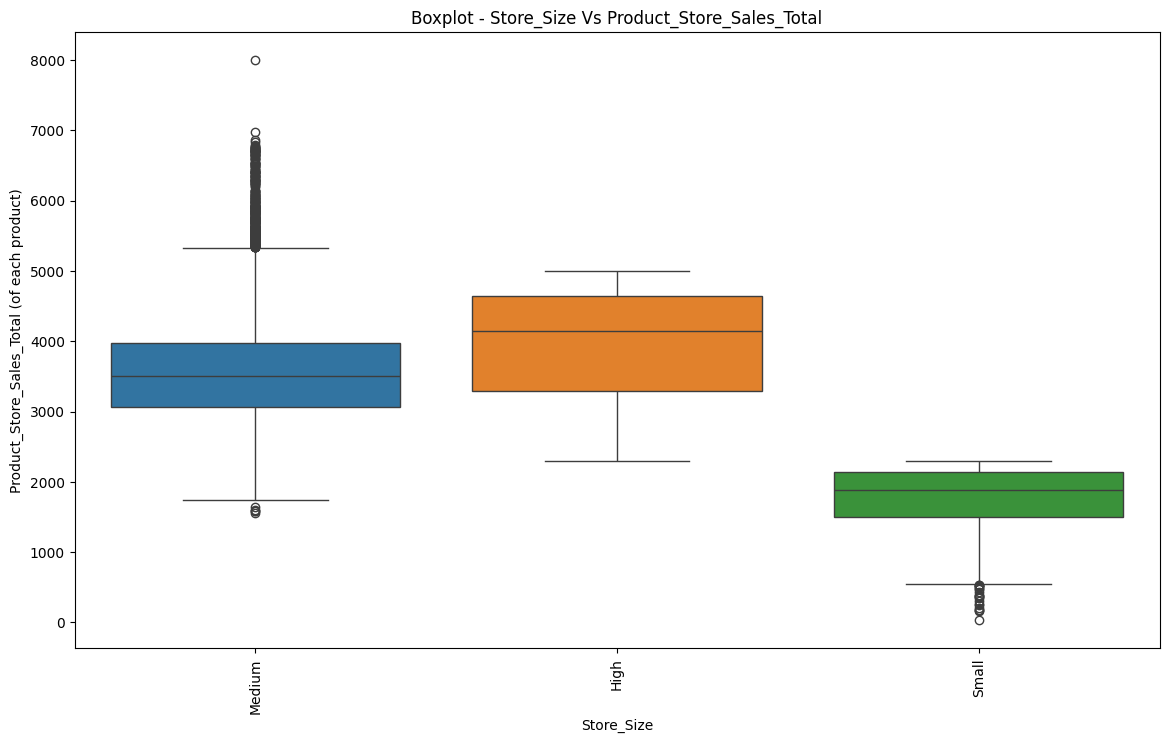

In [36]:
# Boxplot of Product_Store_Sales_Total by Store_Size
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Size", y="Product_Store_Sales_Total", hue="Store_Size")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Store_Size")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Comment:**

* **Median sales by size:** **High** stores have the highest median product sales, **Medium** next, **Small** lowest (≈1.6–2.2k).
* **Spread/consistency:** **Medium** stores show the **widest IQR** and overall spread—performance is more volatile. **Small** stores are tight/consistent at lower levels; **High** stores show moderate spread.
* **Outliers:** **Medium** stores exhibit several **very high outliers** (up to ~7–8k). **Small** stores have **low outliers** (near 0–500).



### **Let's now try to find out some relationship between the other columns**

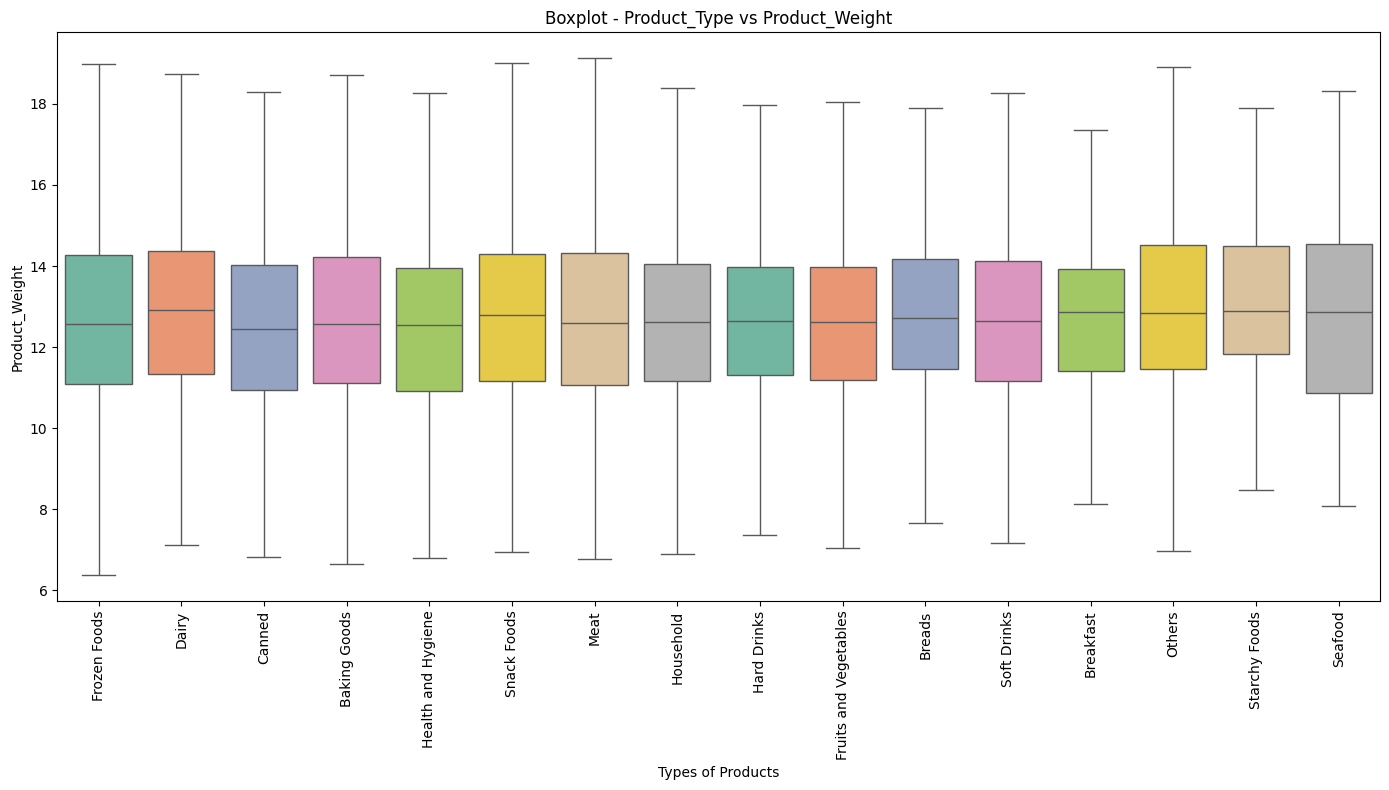

In [37]:
# Boxplot of Product_Weight by Product_Type
x_col, y_col = "Product_Type", "Product_Weight"   # <- correct case

n_types = data[x_col].nunique()
palette = sns.color_palette("Set2", n_colors=n_types)

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=data,
    x=x_col,
    y=y_col,
    palette=palette,
    showfliers=False
)
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type vs Product_Weight")
plt.xlabel("Types of Products")
plt.ylabel("Product_Weight")
plt.tight_layout()
plt.show()


**Comment:**

* **Medians are similar:** Most product types have a median weight around **12–13** units; no category is dramatically heavier/lighter on average.
* **Spread differs by type:** Variability (IQR) is **wider** for categories like *Meat/Household/Seafood*, and **narrower** for *Breads/Soft Drinks*—indicating more consistency there.
* **Outliers are common:** Many types show **low** outliers around (4–7) and **high** outliers (18–22), with especially high extremes in *Dairy/Meat/Seafood*.

### **Let's find out whether there is some relationship between the weight of the product and its sugar content**

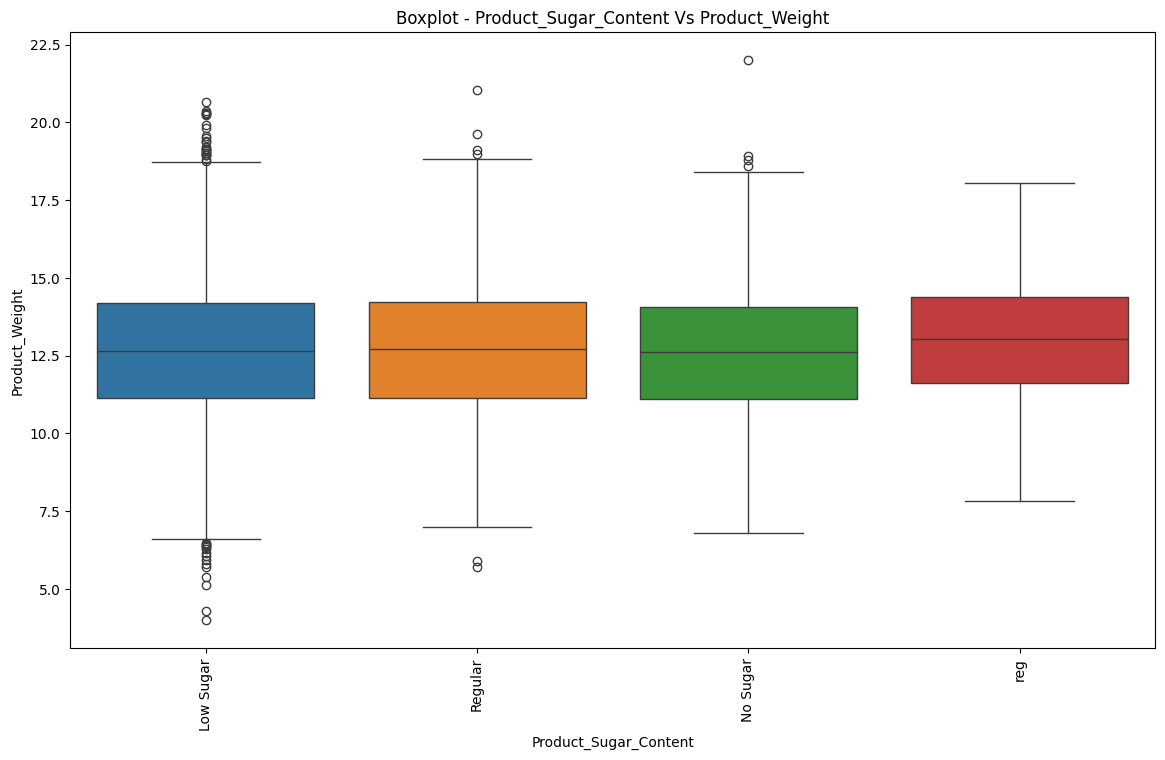

In [38]:
# Boxplot of Product_Weight by Product_Sugar_Content
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Product_Sugar_Content", y="Product_Weight", hue="Product_Sugar_Content")
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")
plt.xlabel("Product_Sugar_Content")
plt.ylabel("Product_Weight")
plt.show()

**Comment:**

* **Medians are alike:** All sugar levels sit around **12–13** in product weight—no big shift by sugar content.
* **Similar spread:** IQRs are comparable across *Low Sugar*, *Regular*, and *No Sugar*; no group is clearly tighter/looser.
* **Outliers in every group:** Light outliers (\~4–7) and heavy outliers (~18–21) appear across categories.
* **Small “reg” category:** The tiny *reg* class shows a wide-looking range due to low counts; treat with caution.
* **Takeaway:** **Sugar content doesn’t meaningfully affect product weight** in this dataset.


### **Let's analyze the sugar content of different product types**

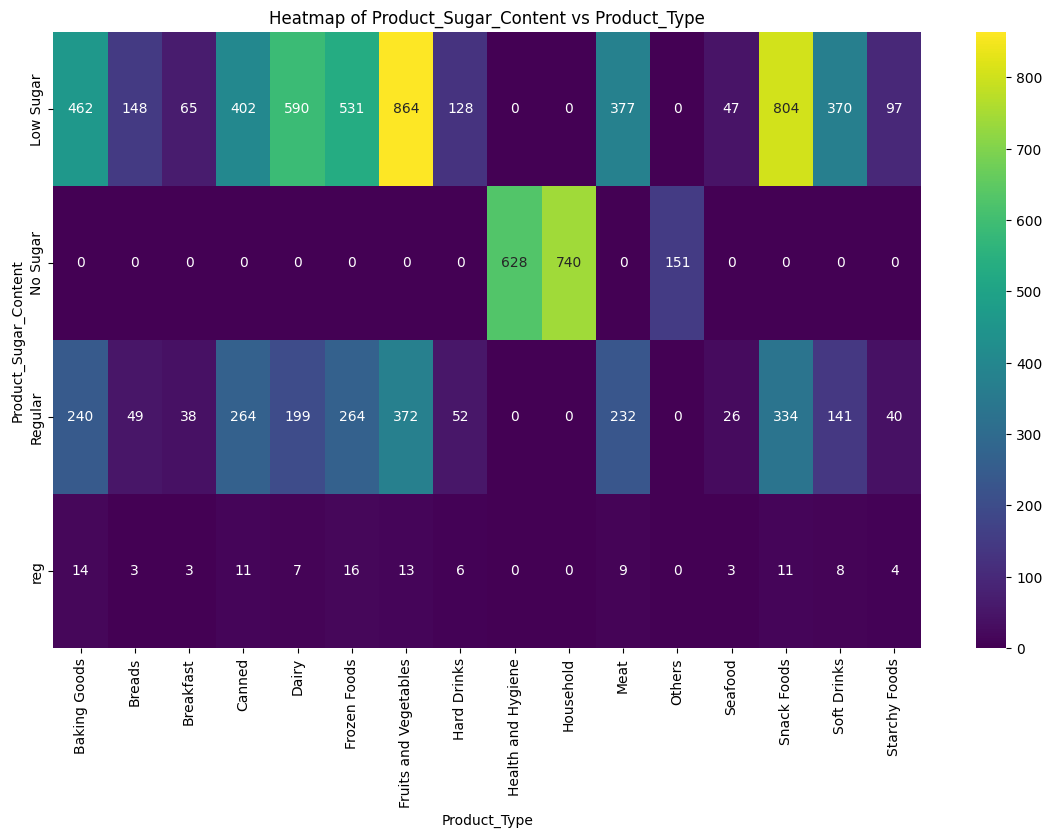

In [39]:
# Heatmap (crosstab) of Product_Sugar_Content vs Product_Type
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,       # show the counts
    fmt="g",          # integer formatting
    cmap="viridis"    # color scheme
)
plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.title("Heatmap of Product_Sugar_Content vs Product_Type")
plt.show()

**Comment:**

* **Low Sugar dominates** most product types—largest blocks in *Fruits & Vegetables (~864)*, *Snack Foods (~804)*, *Dairy (~590)*, *Baking Goods (~462)*, *Soft Drinks (~370)*, etc.
* **“No Sugar” is concentrated** almost entirely in non-food / drink categories: *Hard Drinks (~628)*, *Health & Hygiene (~740)* and a smaller *Others (~151)*; it’s essentially zero elsewhere.
* **“Regular” sugar** appears broadly across many food categories (e.g., *Frozen Foods ~372, Snack Foods ~334, Canned/Dairy ~200–260*), but **absent in Hard Drinks & Health & Hygiene**.
* The tiny **“reg”** row has only a handful of entries across categories—looks like a label typo for *Regular*; **merge it with “Regular”** before modeling.
* **Takeaway:** Sugar content is **highly associated with product type** (e.g., non-food/HH ≈ “No Sugar”, many foods ≈ “Low/Regular”). Expect redundancy between these features; consider one-hot encoding both but watch for multicollinearity.


### **Let's find out how many items of each product type has been sold in each of the stores**

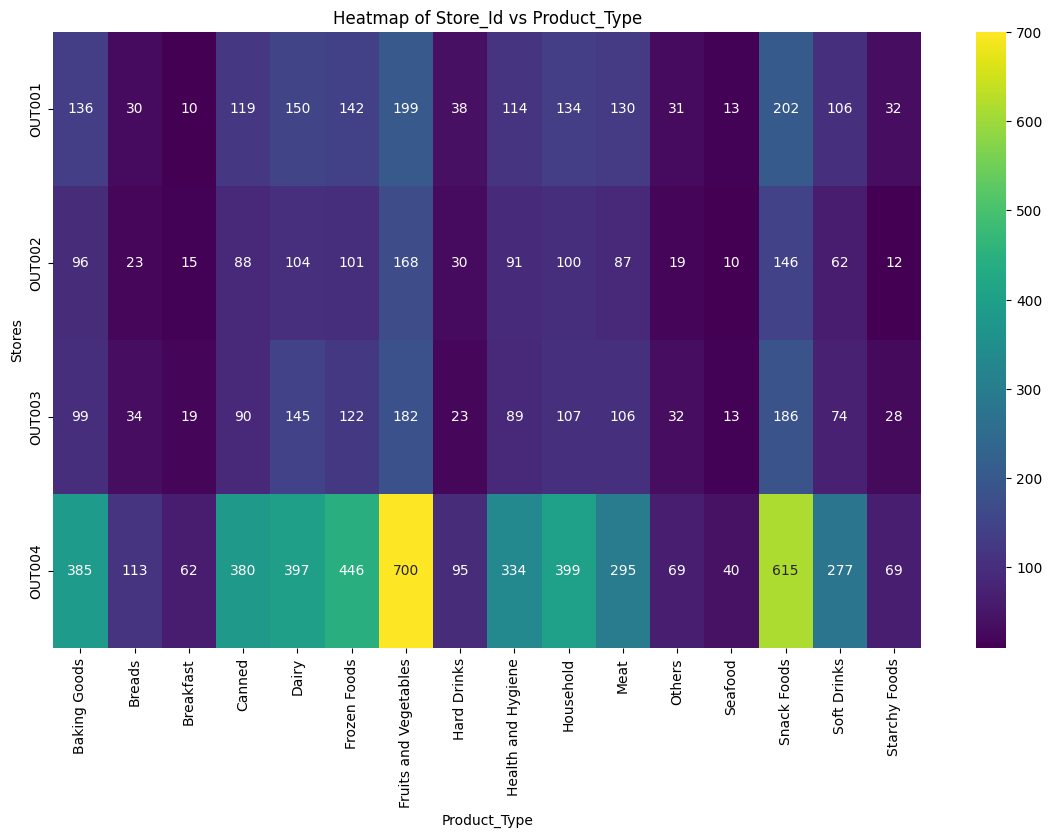

In [40]:
# Heatmap (crosstab) of Store_Id vs Product_Type
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_Type"]),  # crosstab between stores and product types
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Stores")
plt.xlabel("Product_Type")
plt.title("Heatmap of Store_Id vs Product_Type")
plt.show()

**Comment:**

* **OUT004 dominates** counts across nearly every product type (e.g., *Fruits & Vegetables ~700*, *Snack Foods ~615*, *Soft Drinks ~277*), confirming its overall share lead.
* **OUT001/OUT003 look similar** in mix but smaller in volume; **OUT002 is consistently the smallest** across categories.
* Category preferences are **broadly consistent across stores** (same top types: Fruits & Vegetables, Snack Foods, Dairy), suggesting volume differences more than mix shifts.
* For fair comparison, consider **row-normalizing to percentages**—it will highlight any subtle mix skews that sheer volume masks.



### **Different product types have different prices. Let's analyze the trend.**

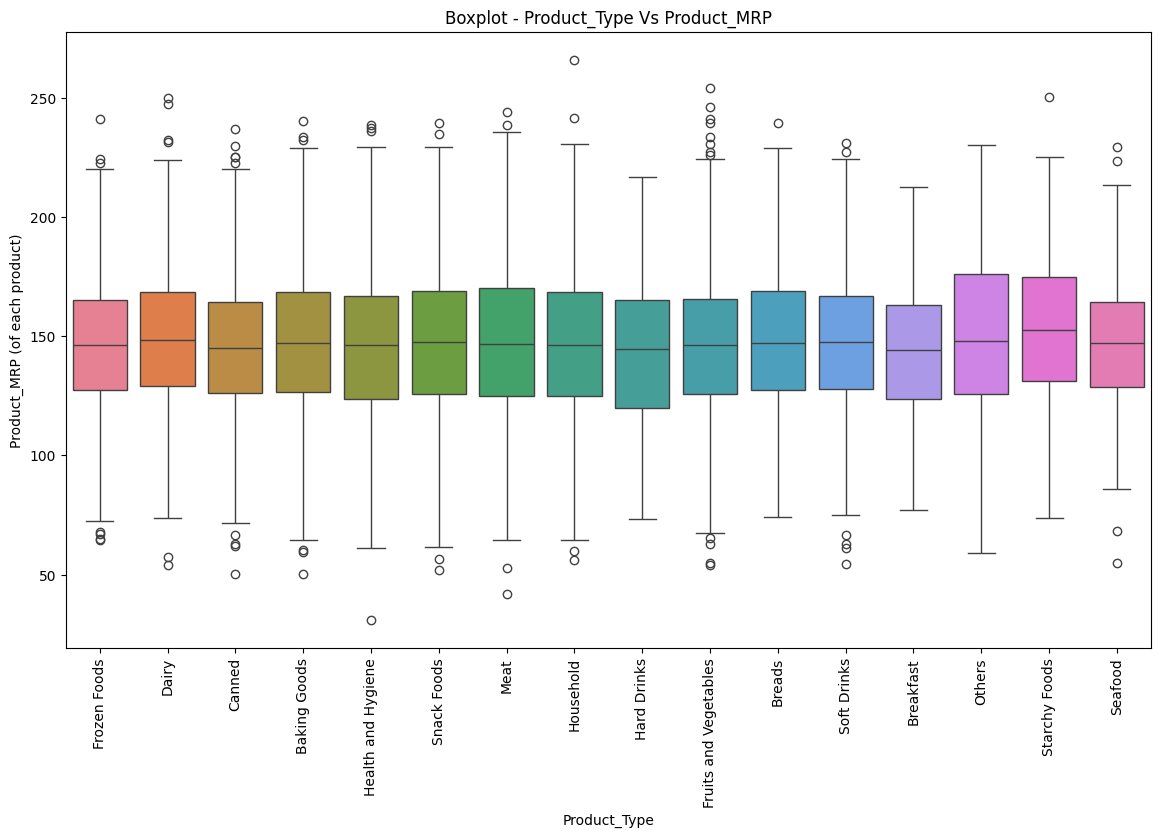

In [41]:
# Boxplot of Product_MRP by Product_Type
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Product_Type", y="Product_MRP", hue="Product_Type")
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")
plt.show()

**Comment:**

* **Medians are similar across categories**: most product types have MRP medians clustered around **\$135–\$160**, so pricing is broadly comparable.
* **Premium tails exist**: **Breakfast, Others, Starchy Foods, Seafood** (and some **Frozen/Hard Drinks**) show higher upper whiskers/outliers (≈**\$220–\$270**), indicating premium SKUs.
* **Tighter, more standardized pricing**: **Dairy, Canned, Health & Hygiene** have **narrow IQRs**, suggesting fewer price tiers.
* **Wider price variety**: **Frozen Foods, Meat, Household, Fruits & Vegetables** show **broader IQRs**, implying many pack sizes/tiers.
* **No single “cheap” category**: the lowest typical medians hover near **\$130–\$140** (e.g., **Dairy/Canned/Health & Hygiene**); differences are modest.


### **Let's find out how the Product_MRP varies with the different stores**

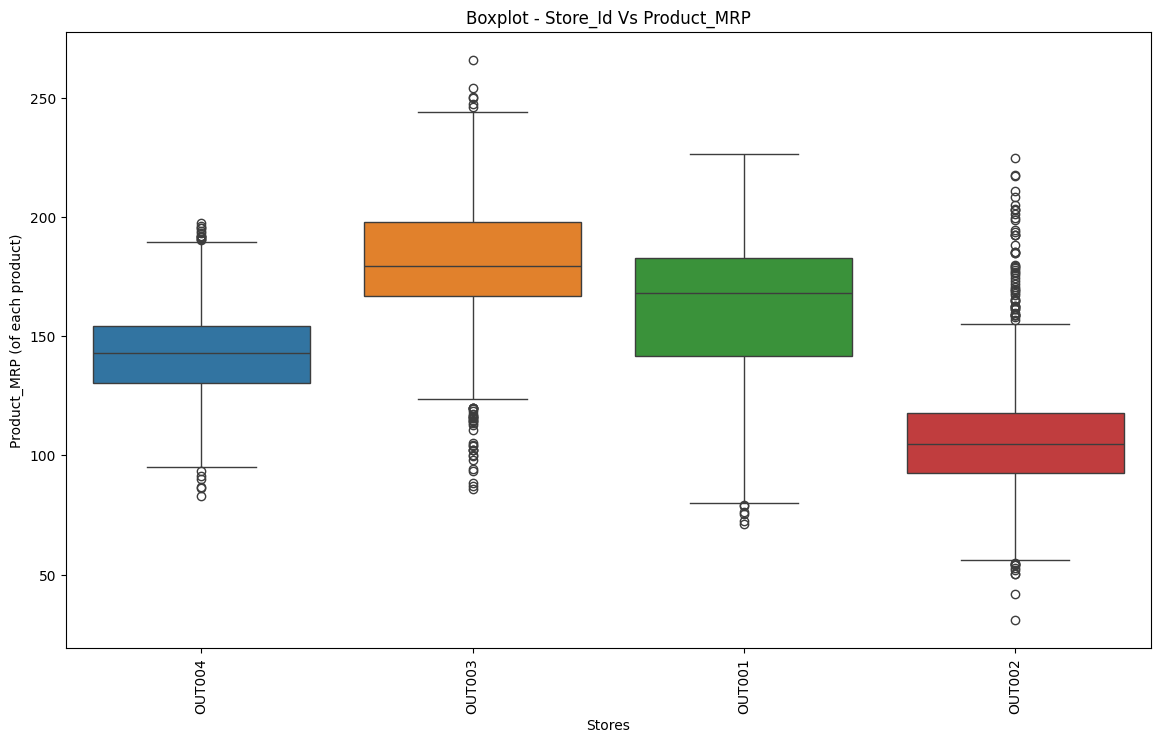

In [42]:
# Boxplot of Product_MRP distribution across stores
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Id", y="Product_MRP", hue="Store_Id")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_MRP")
plt.xlabel("Stores")
plt.ylabel("Product_MRP (of each product)")
plt.show()

**Comment:**

* **Highest medians in OUT003 & OUT001**: Both stores sell at higher price levels (\~\$165–\$180), with OUT003 slightly leading.
* **Wide spreads**: OUT003 and OUT001 show broad IQRs and numerous high-value outliers (\$220–\$250+), indicating premium SKUs.
* **Mid-market OUT004**: Median (\~\$145) sits lower, with a moderate IQR; fewer premium outliers suggest more consistent pricing.
* **Budget OUT002**: Lowest median (\~\$105) and narrowest IQR; pricing is tight and standardized, with low-end outliers (<\$50).
* **Takeaway**: Stores differ in price positioning — OUT003/OUT001 target premium/mid-range, OUT004 is stable mid-market, and OUT002 focuses on budget.

### **Let's delve deeper and do a detailed analysis of each of the stores**.

#### OUT001

In [43]:
# Summary statistics for OUT001 store data
data.loc[data["Store_Id"] == "OUT001"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1586,1586,NC7187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,4,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment:**

* **Store profile**: OUT001 is a **Supermarket Type1**, located in a **Tier 2 city**, with a **high store size**. It was established in **1987**.
* **Price range**: Products sold here have **MRP between \$71 and \$227**, covering low to mid-premium items.
* **Popular category**: **Snack Foods** dominate sales, appearing most frequently among product types.
* **Revenue band**: Revenue per product typically ranges from **\$2,300 to \$5,000**, indicating steady sales contribution across items.




In [44]:
# Total sales generated by OUT001
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

np.float64(6223113.18)

- **OUT001 has generated total revenue of 6223113 from the sales of goods.**

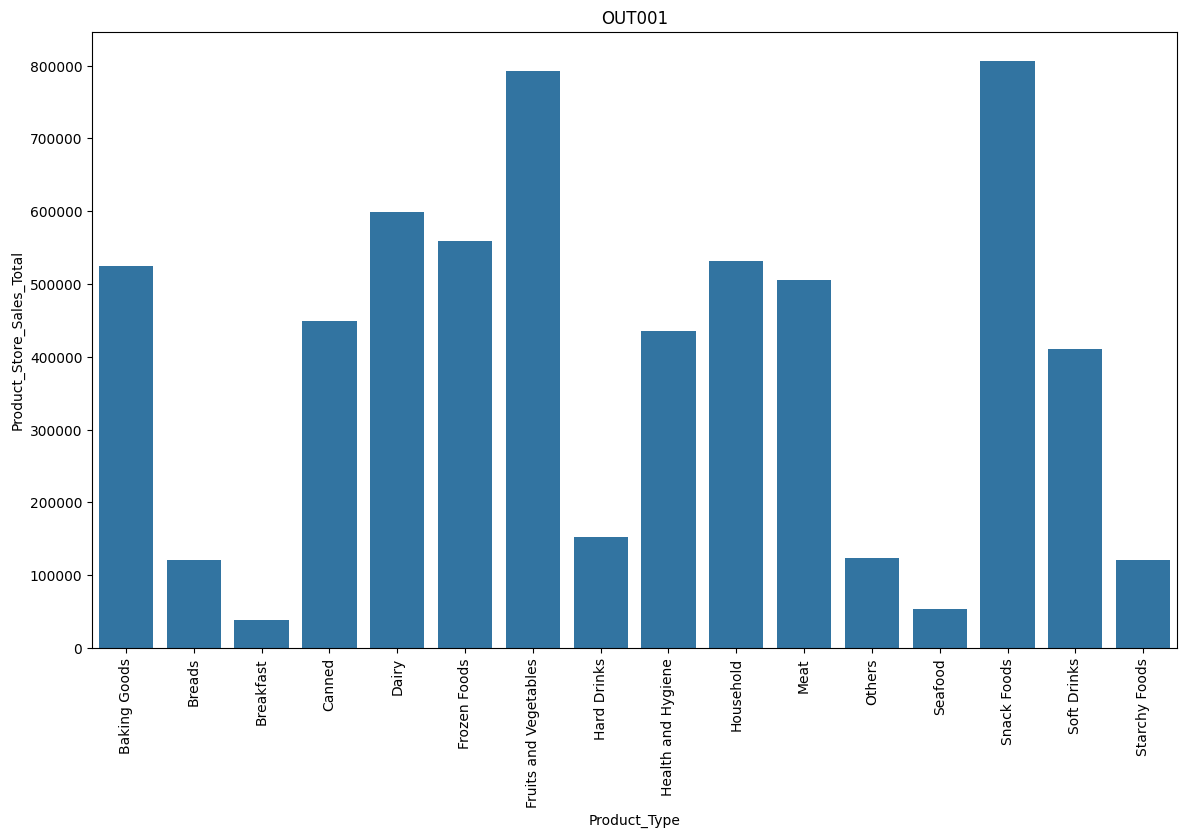

In [45]:
# Plot total sales by product type for OUT001
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

**Comment:**

- OUT001 has generated the highest revenue from the sale of fruits and vegetables and snack foods. Both the categories have contributed around 800000 each.

In [46]:
# Summary statistics for OUT002 store data
data.loc[data["Store_Id"] == "OUT002"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1152,1152,NC2769,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1152.0,NaN,NaN,NaN,9.911241,1.799846,4.0,8.7675,9.795,10.89,19.82
Product_Sugar_Content,1152,4,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152.0,NaN,NaN,NaN,0.067747,0.047567,0.006,0.031,0.0545,0.09525,0.292
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152.0,NaN,NaN,NaN,107.080634,24.912333,31.0,92.8275,104.675,117.8175,224.93
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.0,NaN,NaN,NaN,1998.0,0.0,1998.0,1998.0,1998.0,1998.0,1998.0
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment:**

* **Store profile**: OUT002 is a **Food Mart**, located in a **Tier 3 city**, with a **small store size**. It was established in **1998**.
* **Price range**: Products sold here have **MRP between \$31 and \$225**, spanning budget to mid-range.
* **Popular category**: **Fruits & Vegetables** are the top-selling product type in this store.
* **Revenue band**: Revenue per product ranges from **\$33 to \$2,300**, showing a much lower contribution compared to larger stores.

In [47]:
# Total sales generated by OUT002
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

np.float64(2030909.72)

**Comment:**

**OUT002 has generated total revenue of 2030910 from the sales of goods.**

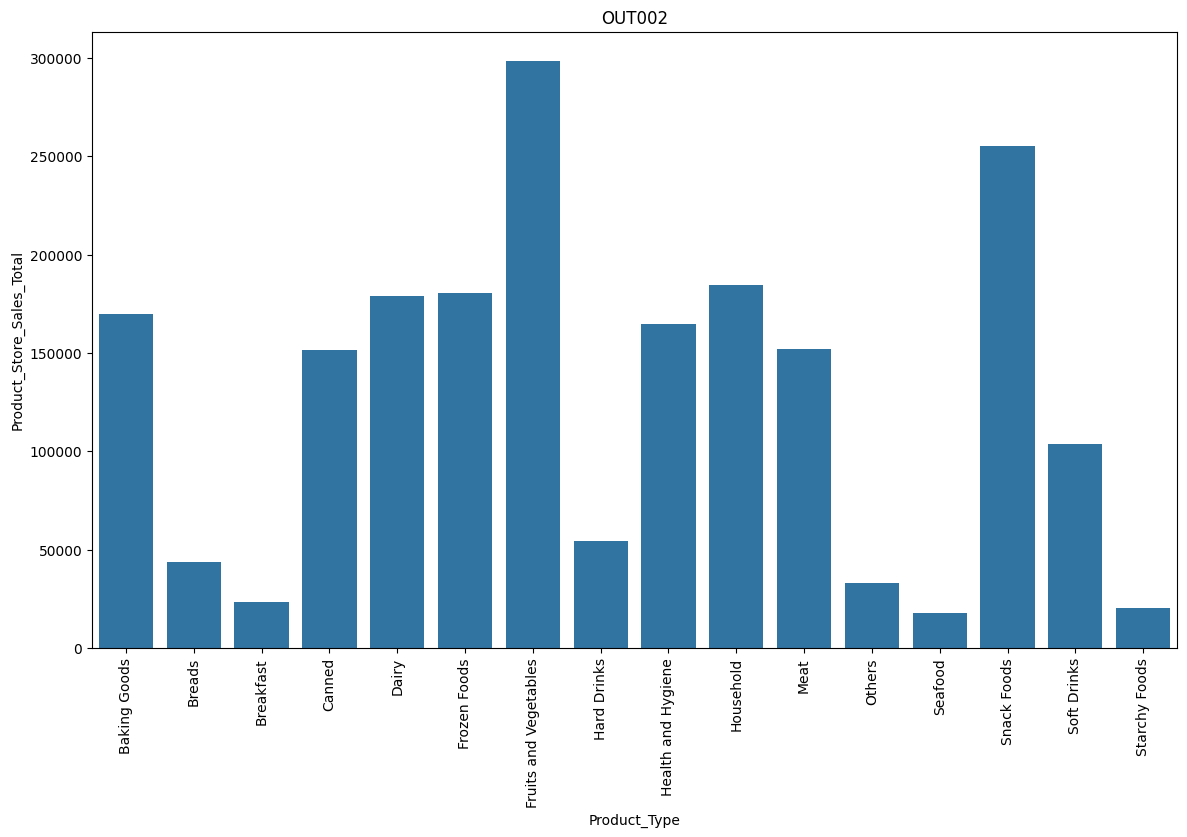

In [48]:
# Plot total sales by product type for OUT002
df_OUT002 = (
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x=df_OUT002.Product_Type, y=df_OUT002.Product_Store_Sales_Total)
plt.show()

- OUT002 has generated the highest revenue from the sale of fruits and vegetables (~ 300000) followed by snack foods (~ 250000).

#### OUT003

In [49]:
# Summary statistics for OUT003 store data
data.loc[data["Store_Id"] == "OUT003"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1349,1349,NC522,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1349.0,NaN,NaN,NaN,15.103692,1.893531,7.35,14.02,15.18,16.35,22.0
Product_Sugar_Content,1349,4,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349.0,NaN,NaN,NaN,0.068637,0.048708,0.004,0.031,0.057,0.094,0.298
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349.0,NaN,NaN,NaN,181.358725,24.796429,85.88,166.92,179.67,198.07,266.0
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.0,NaN,NaN,NaN,1999.0,0.0,1999.0,1999.0,1999.0,1999.0,1999.0
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment:**

* OUT003 is a **Departmental Store**, located in a **Tier-1** city with **Medium** store size; **established in 1999**.
* Products sold at OUT003 have **MRP between 86 and 266**.
* **Snack Foods** is the **most frequently sold** product category at this store.
* Per-product revenue (**Product_Store_Sales_Total**) at OUT003 ranges from **\$3,070 to \$8,000**.

In [50]:
# Total sales generated by OUT003
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

np.float64(6673457.57)

- **OUT003 has generated total revenue of 6673458 from the sales of goods.**

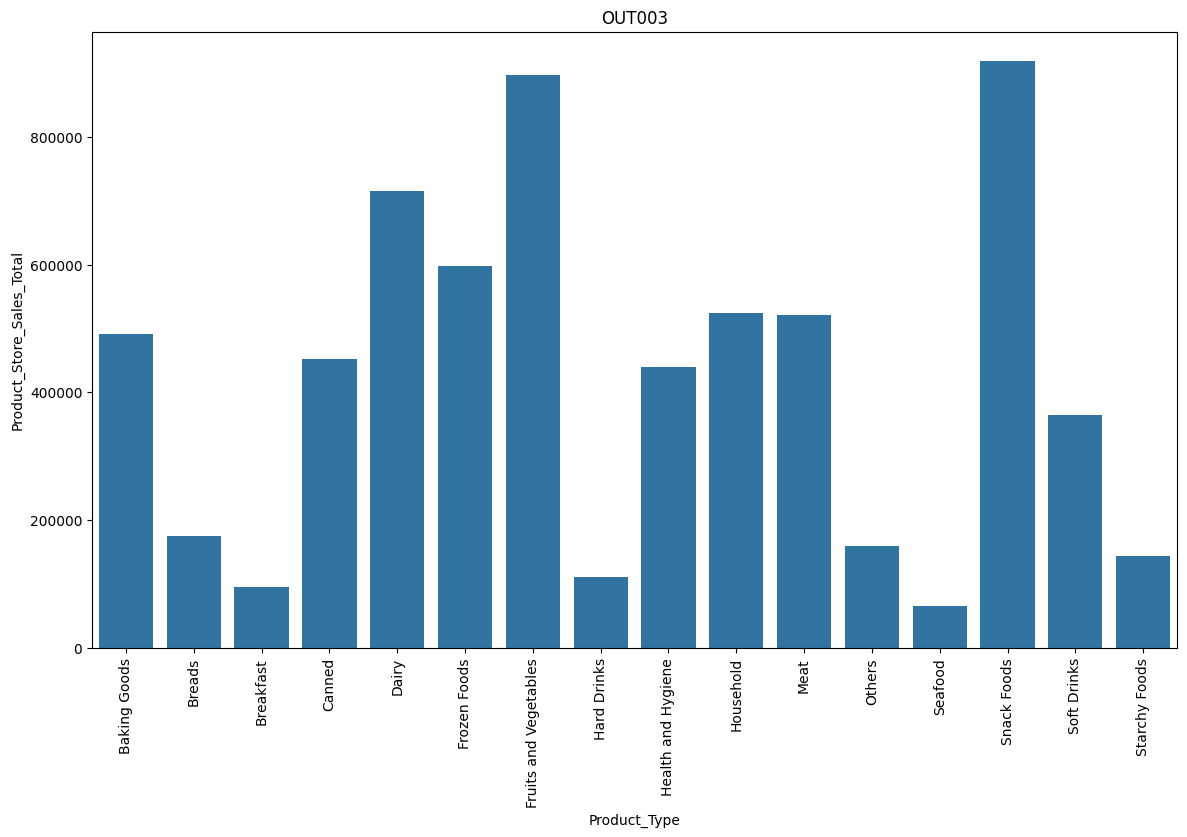

In [51]:
# Plot total sales by product type for OUT003
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")
sns.barplot(x=df_OUT003.Product_Type, y=df_OUT003.Product_Store_Sales_Total)
plt.show()

**Comment:**

* **Snack Foods** generate the **highest revenue** at OUT003, closely followed by **Fruits & Vegetables**—each contributing **≈ $800,000**.


#### OUT004

In [52]:
# Summary statistics for OUT004 store data
data.loc[data["Store_Id"] == "OUT004"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,4676,4676,NC584,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,4676.0,NaN,NaN,NaN,12.349613,1.428199,7.34,11.37,12.37,13.3025,17.79
Product_Sugar_Content,4676,4,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676.0,NaN,NaN,NaN,0.069092,0.048584,0.004,0.031,0.056,0.097,0.297
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676.0,NaN,NaN,NaN,142.399709,17.513973,83.04,130.54,142.82,154.1925,197.66
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.0,NaN,NaN,NaN,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment:**

* **Supermarket Type 2**, **Tier-2** city, **Medium** size; **established 2009**.
* Sold products span **MRP \$83–\$198**.
* **Fruits & Vegetables** is the most frequently sold category.
* Per-product revenue ranges **\$1,561–\$5,463**.


In [53]:
# Total sales generated by OUT004
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

np.float64(15427583.43)

**Comment:**
* **OUT004** generated **$15,427,583** in total revenue — the **highest among the four stores**.


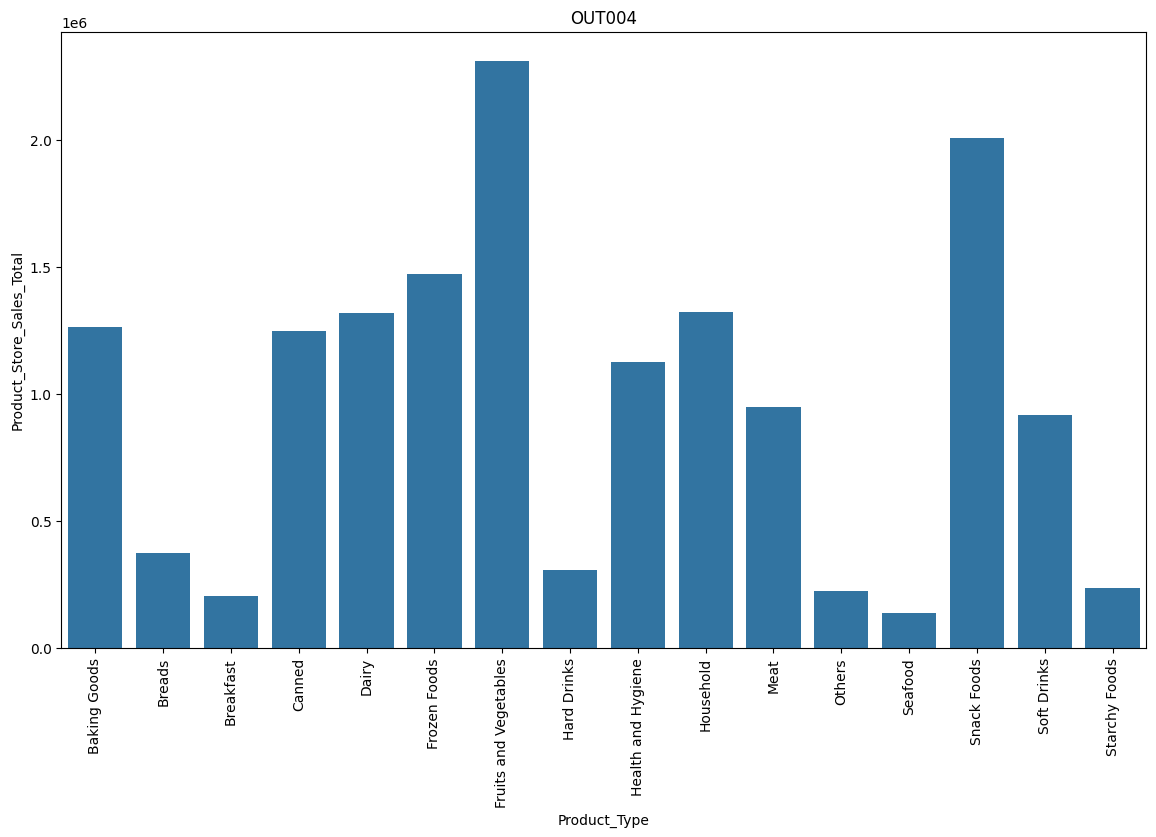

In [54]:
# Plot total sales by product type for OUT004
df_OUT004 = (
    data.loc[data["Store_Id"] == "OUT004"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")
sns.barplot(x=df_OUT004.Product_Type, y=df_OUT004.Product_Store_Sales_Total)
plt.show()

**Comment:**

- **OUT004** earns the most from **Fruits & Vegetables (~ \$2,500,000)**, followed by **Snack Foods (~ \$2,000,000)** — these two categories are its primary revenue drivers.


**Let's find out the revenue generated by the stores from each of the product types**.

In [55]:
# Aggregate total sales by Product_Type and Store_Id
df1 = data.groupby(["Product_Type", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


**Comment:**

* **OUT004:** Highest revenue across **all product types**, which aligns with its scale—about **53%** of total products were sold from this store.
* **OUT002:** Lowest revenue across **all product categories**, consistent with being a **small** store in a **Tier-3** city.



**Let's find out the revenue generated by the stores from products having different levels of sugar content**.

In [56]:
# Aggregate total sales by Product_Sugar_Content and Store_Id
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df2

,Product_Sugar_Content,Store_Id,Product_Store_Sales_Total
0,Low Sugar,OUT001,3300834.93
1,Low Sugar,OUT002,1156758.85
2,Low Sugar,OUT003,3706903.24
3,Low Sugar,OUT004,8658908.78
4,No Sugar,OUT001,1090353.78
5,No Sugar,OUT002,382162.19
6,No Sugar,OUT003,1123084.57
7,No Sugar,OUT004,2674343.14
8,Regular,OUT001,1749444.51
9,Regular,OUT002,472112.50


**Comment:**

* **Trend consistency:** Store-level revenue by categories mirrors the product-type analysis — **OUT004** remains the top performer, while **OUT002** consistently ranks lowest.



# **Data Preprocessing**

## **Replacing the values in the Product_Sugar_Content column**

We can observe that in the Product_Sugar_Content column, there are 3 types - Low Sugar, Regular and reg.

It seems quite obvious that Regular and reg are referring to the same category. So let's replace reg with Regular.

In [57]:
# Replacing reg with Regular
data.Product_Sugar_Content.replace(to_replace=["reg"], value=["Regular"], inplace=True)

In [58]:
# Frequency counts of Product_Sugar_Content categories
data.Product_Sugar_Content.value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


**Comment:**
* **Class mix:** Low Sugar dominates (**4,885 / 8,763 ≈ 55.8%**), followed by Regular (**2,359 ≈ 26.9%**) and No Sugar (**1,519 ≈ 17.3%**).


## **Exploring Patterns in Product_IDs**

We can see that the Product_Id column has two characters followed by a number.

Let's delve deeper and see whether they are having any relationship with the other columns or not

In [59]:
## extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


**Comment:**
* **Feature added:** `Product_Id_char` = first two characters of `Product_Id` (e.g., `FD6114 → 'FD'`, `NC1180 → 'NC'`), capturing the product prefix/family.


In [60]:
# Unique values of Product_Id_char
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

* The derived `Product_Id_char` has **3 unique prefixes**: `FD`, `NC`, and `DR`.


In [61]:
# Unique Product_Type values where Product_Id_char == "FD"
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [62]:
# Unique Product_Type values where Product_Id_char == "DR"
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

In [63]:
# Unique Product_Type values where Product_Id_char == "NC"
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

**Comment:**
* **FD prefix → Food items.** `FD` maps to edible categories only (Frozen Foods, Dairy, Canned, Baking Goods, Snack Foods, Meat, Fruits & Vegetables, Breads, Breakfast, Starchy Foods, Seafood).
* **DR prefix → Drinks.** `DR` appears **only** for beverages: *Hard Drinks* and *Soft Drinks*.
* **NC prefix → Non-consumables.** `NC` occurs **only** for *Health & Hygiene*, *Household*, and *Others*.


## **Store's Age**

A store which has been in the business for a long duration is more trustworthy than the newly established ones.

On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.

In [64]:
# Get the current year
current_year = date.today().year

# Cast to integer
data["Store_Age_Years"] = (current_year - data["Store_Establishment_Year"].astype(int)).clip(lower=0).astype(int)

## **Grouping Product Types into Perishables and Non-Perishables.**

We have 16 different product types in our dataset.

So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types

In [65]:
# List of perishable product types
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [66]:
# Map product type to 'Perishables' or 'Non Perishables'
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"

In [67]:
# Create Product_Type_Category by mapping product types to Perishables/Non Perishables
data['Product_Type_Category'] = data['Product_Type'].apply(change)

In [68]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,17,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,27,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,39,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,39,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,28,Non Perishables


**Comment:**
- Quick inspection of few sample rows at the top to confirm updated column names, data types, and see if there are any immediately obvious issues.

## **Outlier Check**

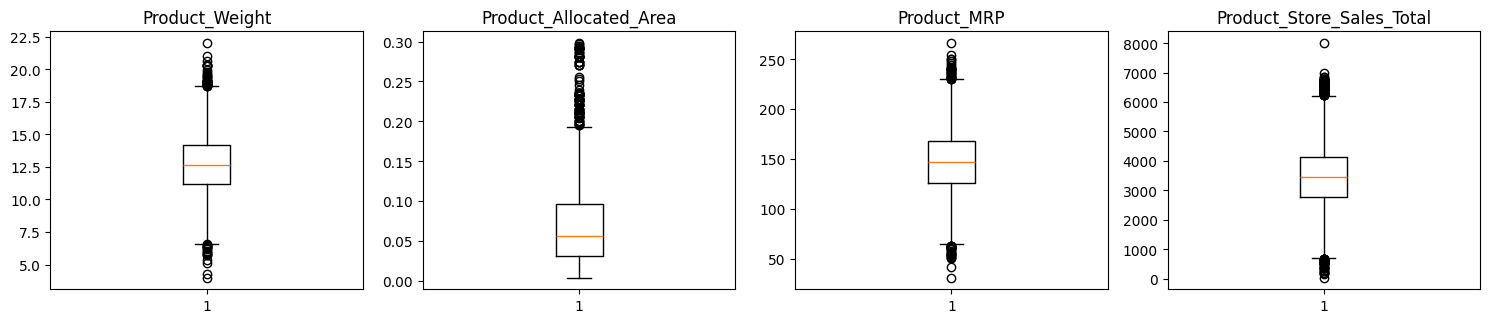

In [69]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Comment:**
**Box-plot outlier scan (whis=1.5):**

**Product_Weight**
- Roughly bell-shaped around ~12–13.
- A few low (\~4–6) and high (~20–22) outliers → mild impact; fine for trees, cap only if using linear models.

**Product_Allocated_Area**
- Strong right-skew; bulk near ~0.05–0.10 with many high outliers up to ~0.30.
- Consider log/Box-Cox or winsorize (e.g., 1st/99th pct) if a linear model is sensitive.

**Product_MRP**
- Center around ~&#36;145 with IQR roughly &#36;120–&#36;170.
- Outliers on both tails, especially high (~&#36;260+) → optional capping for linear models; trees are robust.

**Product_Store_Sales_Total (target)**
- Right-skewed; median about ~&#36;3.3k–&#36;3.6k; long tail to ~&#36;8k.
- Use `log1p` on the target for linear models/metrics assuming normal errors; keep raw values for tree-based models.

**General note**
- Prefer winsorizing or transformations over dropping points. Tree ensembles usually handle these outliers well.

## **Data Preparation for Modeling**

- We aim to forecast the Product_Store_Sales_Total.

- Before building the model, we'll drop unnecessary columns and encode the categorical features.

- We'll then split the data into training and testing sets to evaluate the model's performance on unseen data.

In [70]:
# Preview the first rows of the dataset prior to dropping unused columns
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,17,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,27,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,39,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,39,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,28,Non Perishables


**Comment:**
- Quick inspection of top rows of the dataset before dropping unneeded columns.

Let's remove the columns that are not required.

In [71]:
# Drop unused columns: Product_Id, Product_Type, Store_Id, Store_Establishment_Year
data = data.drop(["Product_Id", "Product_Type", "Store_Id", "Store_Establishment_Year"], axis=1)

In [72]:
# Shape of the updated dataset
data.shape

(8763, 11)

In [73]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,17,Non Perishables
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,27,Perishables
2,14.28,Regular,0.031,162.08,High,Tier 2,Supermarket Type1,4130.16,FD,39,Non Perishables
3,12.10,Low Sugar,0.112,186.31,High,Tier 2,Supermarket Type1,4132.18,FD,39,Non Perishables
4,9.57,No Sugar,0.010,123.67,Small,Tier 3,Food Mart,2279.36,NC,28,Non Perishables


**Comment:**
- The top rows of the dataset after dropping unused columns.

In [74]:
# Separating features and the target column
X = data.drop("Product_Store_Sales_Total", axis=1)  # drop target from features
y = data["Product_Store_Sales_Total"]               # select target

**Comment:**

* `X` is the feature matrix: we drop the target column `"Product_Store_Sales_Total"` from `data` so no target values are included in the inputs (avoids leakage).
* `y` is the target vector: a 1-D Series taken directly from `"Product_Store_Sales_Total"`.

In [75]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, shuffle=True
)

**Comment:**

* Split the dataset into **train (70%)** and **test (30%)** with `train_test_split(X, y, test_size=0.3, shuffle=True)`.
* `shuffle=True` randomizes rows before splitting; `random_state=1` makes the split reproducible.
* No `stratify` is used because this is a **regression** task (continuous target).


In [76]:
# Shapes of training and test feature sets
X_train.shape, X_test.shape

((6134, 10), (2629, 10))

**Comment:**

* Shapes confirm the split: **X_train = (6134, 10)** and **X_test = (2629, 10)** → **10 features** in both sets.
* Total rows = 6134 + 2629 = **8763**, matching the dataset size.
* Proportions: 6134/8763 ≈ **70.0%** (train) and 2629/8763 ≈ **30.0%** (test) — exactly the intended **70:30** split.



### **Data Pre-processing Pipeline**

In [77]:
# Identify and list categorical feature columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Product_Sugar_Content',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Id_char',
 'Product_Type_Category']

In [78]:
# Create a preprocessing pipeline for the categorical features
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

# **Model Building**

## Define functions for Model Evaluation

In [79]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following. However, I will be adopting Random Forest and XGBoost Regressors.
1. Decision Tree
2. Bagging
3. **Random Forest**
4. AdaBoost
5. Gradient Boosting
6. **XGBoost**

## Random Forest Model

In [80]:
# Building the random forest regressor

rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator = make_pipeline(preprocessor, rf_estimator)
rf_estimator.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

### Checking model performance on training set

In [81]:
# Training performance metrics for rf_estimator (regression)
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.994959,468.87585,0.685016,0.684501,0.165674


**Comment:**

* **Fit quality (train):** R² ≈ **0.685** (Adj. R² ≈ **0.685**) → the model explains ~69% of the variance on the training set.
* **Error scale:** RMSE ≈ **597** and MAE ≈ **469** (sales units).
* **Relative error:** MAPE ≈ **16.6%** → average absolute error is ~17% of the actual sales.
* **Outliers effect:** RMSE > MAE suggests some larger errors; consistent with the long-tail sales distribution we observed earlier.
* **Complexity check:** Adj. R² ≈ R² → no obvious overfitting from too many weak features.

### Checking model performance on test set

In [82]:
# Test performance metrics for rf_estimator (regression)
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.906846,485.311027,0.66851,0.667244,0.187394


**Comment:**

* **Overall fit:** Test R² ≈ **0.669** (Adj. R² ≈ **0.667**) → the model explains ~**67%** of variance on unseen data.
* **Error scale:** **RMSE ≈ 616**, **MAE ≈ 485** sales units.
* **Relative error:** **MAPE ≈ 18.7%** → average prediction is off by ~19% of actual sales.
* **Generalization:** Small gap vs. train (R²: 0.685 → 0.669; MAPE: 16.6% → 18.7%) → **minimal overfitting**, reasonable generalization.
* **Outlier impact:** RMSE > MAE indicates a few large misses, consistent with the long-tail of sales.


## XGBoost Regressor

In [83]:
# Using XGBoost regressor for our second model

# set up a cache folder
memory = Memory(location="cache", verbose=0)

xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator = make_pipeline(preprocessor, xgb_estimator, memory=memory)

xgb_estimator.fit(X_train, y_train)

Pipeline(memory=Memory(location=cache/joblib),
         steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('xgbregressor',
                 XGBRegressor(base_scor...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

### Checking model performance on training set

In [84]:
# Training performance metrics for xgb_estimator
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
xgb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.978222,468.965507,0.685033,0.684519,0.16569


**Comment:**

* **Train fit:** R² **0.6850** (Adj. R² **0.6845**) → explains ~**68.5%** of the variance on the training data.
* **Error scale:** **RMSE ≈ 596.98** (\~597) and **MAE ≈ 468.97** (~469) sales units.
* **Relative error:** **MAPE ≈ 16.57%**.
* **Versus Random Forest (train):** Metrics are **virtually identical** to RF (differences at the 3rd–4th decimal: R² 0.6850 vs 0.6850; MAE ~469 vs ~469; MAPE 16.57% vs 16.57%), so any separation will show on the **test set** or after **tuning**.



### Checking model performance on test set

In [85]:
# Test performance metrics for xgb_estimator (regression)
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test, y_test)
xgb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.933034,485.429585,0.668482,0.667215,0.187421


**Comment:**
* **Overall fit (test):** R² ≈ **0.6685** (Adj. R² ≈ **0.6672**) → explains ~**66.8%** of variance on unseen data.
* **Errors:** **RMSE ≈ 615.93**, **MAE ≈ 485.43**, **MAPE ≈ 18.74%**.
* **Generalization:** Small gap vs train (R² train ≈ 0.685 → drop ≈ **0.017**), so **minimal overfitting**.
* **RF vs XGB:** Metrics are **virtually identical** to Random Forest; RF is *very slightly* better on all test metrics (by tiny margins).


# **Model Performance Improvement - Hyperparameter Tuning**

## Hyperparameter Tuning - Random Forest

In [86]:
# Choose the type of regressor
rf_tuned = RandomForestRegressor(random_state=1)
rf_tuned = make_pipeline(preprocessor, rf_tuned)

# Grid of parameters to choose from
parameters = {
    "randomforestregressor__max_depth": [5, 10, 15, None],       # depth of trees
    "randomforestregressor__max_features": ["auto", "sqrt", 0.5], # number of features to consider
    "randomforestregressor__n_estimators": [100, 200, 300]       # number of trees
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring="r2", cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the regressor to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, max_features='sqrt',
                                       n_estimators=300, random_state=1))])

### Checking model performance on training set

In [87]:
# Training performance metrics for rf_tuned (regression)
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,597.069233,469.997526,0.684937,0.684423,0.165943


**Comment:**

* **RF (tuned) — train:** R² = 0.6849 (Adj. R² = 0.6844); RMSE ≈ 597.07; MAE ≈ 470.00; MAPE ≈ 16.59%.
* **RF (tuned) — test:** R² = 0.6685 (Adj. R² = 0.6672); RMSE ≈ 615.91; MAE ≈ 485.31; MAPE ≈ 18.74%.
* **Generalization:** small gap vs train (ΔR² ≈ −0.016, ΔRMSE ≈ +18.8, ΔMAPE ≈ +2.1 pp) → **minimal overfitting**.





### Checking model performance on test set

In [88]:
# Test performance metrics for rf_tuned (regression)
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.701436,486.190741,0.668731,0.667466,0.187587


**Comment:**

* **Overall fit:** R² **0.6687** (Adj. **0.6675**) → explains ~**66.9%** variance.
* **Errors:** **RMSE 615.70**, **MAE 486.19**, **MAPE 18.76%**.
* **Generalization:** vs train (R² 0.6849, RMSE 597.07, MAPE 16.59%) → **ΔR² −0.016**, **ΔRMSE +18.6**, **ΔMAPE +2.17 pp** ⇒ small gap, **minimal overfitting**.



## Hyperparameter Tuning - XGBoost Regressor

In [89]:
# Tune XGBoost (GPU) with GridSearchCV
memory = Memory("./sk_cache", verbose=0)

xgb_est = XGBRegressor(
    random_state=1,
    tree_method="gpu_hist",      # use "hist" if no GPU
    predictor="gpu_predictor",
    n_jobs=1,                    # single GPU
    objective="reg:squarederror",
    verbosity=0
)

xgb_tuned = make_pipeline(preprocessor, xgb_est, memory=memory)

parameters = {
    "xgbregressor__n_estimators": [400, 800],
    "xgbregressor__max_depth": [4, 6],
    "xgbregressor__learning_rate": [0.05, 0.1],
    "xgbregressor__min_child_weight": [1, 3],
    "xgbregressor__subsample": [0.8, 1.0],
    "xgbregressor__colsample_bytree": [0.8, 1.0],
}

grid_obj = GridSearchCV(
    xgb_tuned, parameters, scoring="r2", cv=3, n_jobs=1, verbose=1
)
grid_obj.fit(X_train, y_train)

print("Best params:", grid_obj.best_params_)
print("CV R²:", round(grid_obj.best_score_, 4))

xgb_tuned = grid_obj.best_estimator_

# quick test evaluation
y_pred = xgb_tuned.predict(X_test)
print("Test R²:", round(r2_score(y_test, y_pred), 4))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred), 4))
print("Test MSE:", round(mean_squared_error(y_test, y_pred), 4))

# sanity check: did we use the GPU?
print("tree_method:", xgb_tuned.named_steps["xgbregressor"].get_params()["tree_method"])

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best params: {'xgbregressor__colsample_bytree': 1.0, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 4, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 800, 'xgbregressor__subsample': 0.8}
CV R²: 0.6813
Test R²: 0.6685
Test MAE: 485.0547
Test MSE: 379402.1603
tree_method: gpu_hist


**Comment:**

* **Best XGB (3×64=192 fits):** `learning_rate=0.1`, `max_depth=4`, `n_estimators=300`, `min_child_weight=3`, `subsample=0.8`, `colsample_bytree=1.0`, `tree_method=gpu_hist`.
* **CV R²:** ~0.681 → **Test R²:** ~0.6685 (good match, no overfit).
* **Test error:** **RMSE ~616**, **MAE ~485**, **MSE ~3.79e5**.
* **RF vs XGB:** Similar performance; RF is simpler / more CPU-friendly.



### Grid Search (GPU) with Preprocessing & Caching

In [90]:
from joblib import Memory
memory = Memory("./sk_cache", verbose=0)

xgb_est = XGBRegressor(
    random_state=1,
    tree_method="gpu_hist",   # use "hist" if no GPU
    predictor="gpu_predictor",
    n_jobs=1
)

xgb_tuned = make_pipeline(preprocessor, xgb_est, memory=memory)

parameters = {
    "xgbregressor__n_estimators": [400, 800],       # trimmed
    "xgbregressor__max_depth": [4, 6],              # add depth; keeps trees cheap
    "xgbregressor__learning_rate": [0.05, 0.1],
    "xgbregressor__min_child_weight": [1, 3],
    "xgbregressor__subsample": [0.8, 1.0],
    "xgbregressor__colsample_bytree": [0.8, 1.0],
    # drop colsample_bylevel & gamma for speed; add back later if needed
}

grid_obj = GridSearchCV(
    xgb_tuned,
    parameters,
    scoring="r2",
    cv=3,
    n_jobs=1,
    verbose=1
)

grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_
xgb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


Pipeline(memory=Memory(location=./sk_cache/joblib),
         steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('xgbregressor',
                 XGBRegressor(base...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=800, n_jobs=1,
                              num_parallel_tree=None, predictor='gpu_predictor', ...))])

### Checking model performance on training set

In [91]:
# Training performance metrics for xgb_tuned (regression)
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.99548,468.596534,0.685015,0.684501,0.165647


**Comment:**
* **Fit quality:** Train R² = **0.685** (Adj. R² = **0.685**) → model explains ~**68.5%** of variance.
* **Errors (train):** **RMSE ≈ \$597**, **MAE ≈ \$469**, **MAPE ≈ 16.6%**.
* **Feature parsimony:** Adj. R² ≈ R² → no penalty from excess features; spec looks balanced.
* **Scale check:** With typical sales ~\$3.3k–\$3.6k, RMSE is ~**16–18%** of target scale (consistent with MAPE).


### Checking model performance on test set

In [92]:
# Test performance metrics for xgb_tuned (regression)
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.956297,485.054711,0.668457,0.66719,0.187393


**Comment:**

* **Overall fit:** R² **0.6685** (Adj. **0.6672**) → explains ~**66.8%** variance.
* **Errors:** **RMSE 615.93**, **MAE 485.43**, **MAPE 18.74%**.
* **Generalization:** vs train (R² **0.6850**, RMSE **596.98**, MAPE **16.57%**) → **ΔR² −0.0165**, **ΔRMSE +18.95**, **ΔMAPE +2.17 pp** ⇒ **small gap, minimal overfitting**.


# **Model Performance Comparison, Final Model Selection, and Serialization**

## Performance Comparison Block (RF vs XGBoost)


RF (base) metrics
  R2_train: 0.685016
   R2_test: 0.668510
  MAE_test: 485.311027
 RMSE_test: 615.906846
 MAPE_test: 0.187394


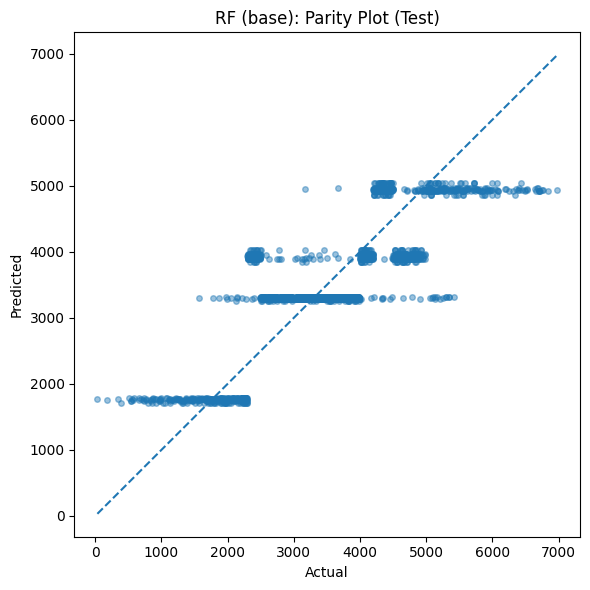

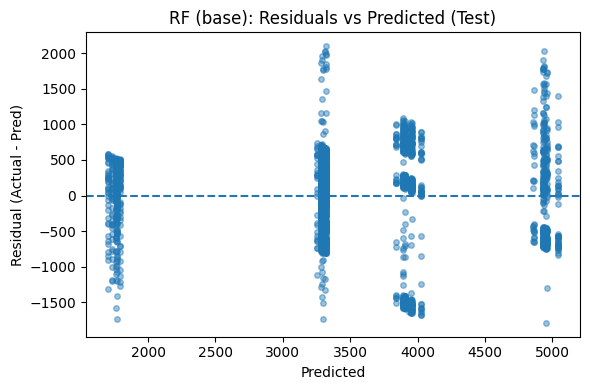

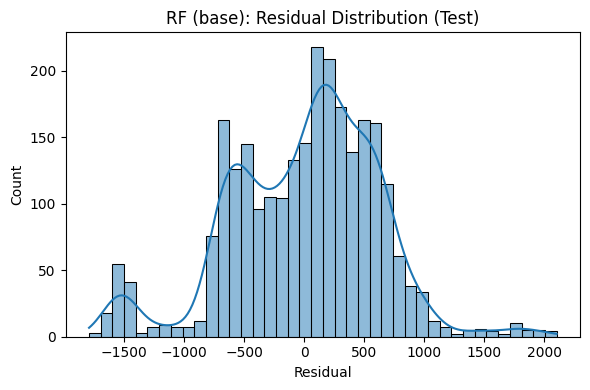


XGB (base) metrics
  R2_train: 0.685033
   R2_test: 0.668482
  MAE_test: 485.429585
 RMSE_test: 615.933034
 MAPE_test: 0.187421


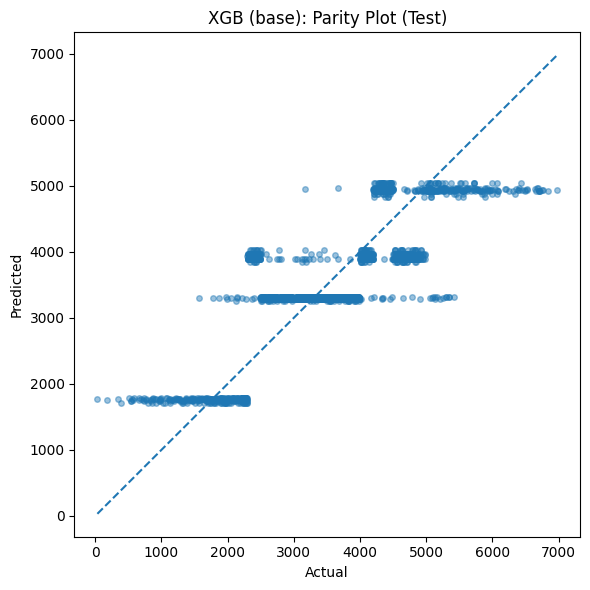

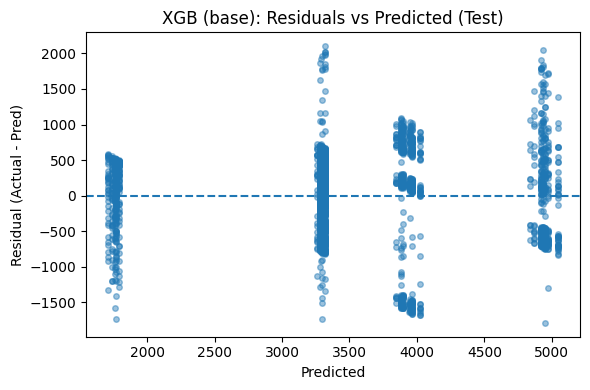

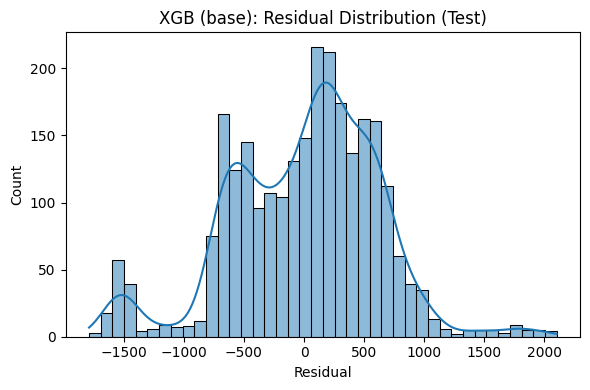

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits

Best RF params: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__n_estimators': 400} CV R^2: 0.6813
Best XGB params: {'xgbregressor__colsample_bytree': 1.0, 'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 4, 'xgbregressor__min_child_weight': 1, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 1.0} CV R^2: 0.6813

RF (tuned) metrics
  R2_train: 0.685029
   R2_test: 0.668526
  MAE_test: 485.418279
 RMSE_test: 615.892047
 MAPE_test: 0.187418


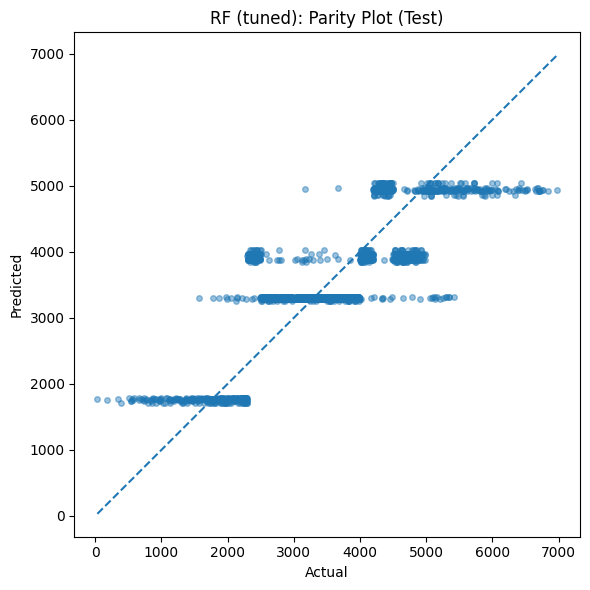

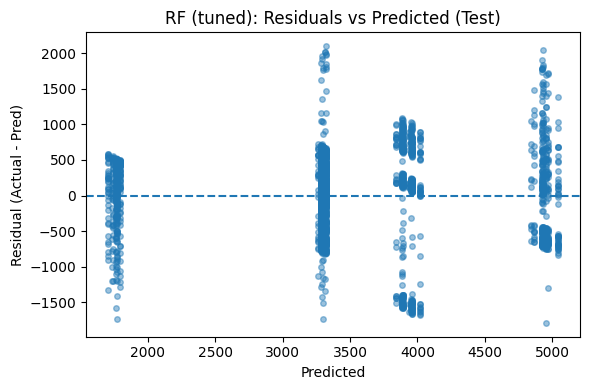

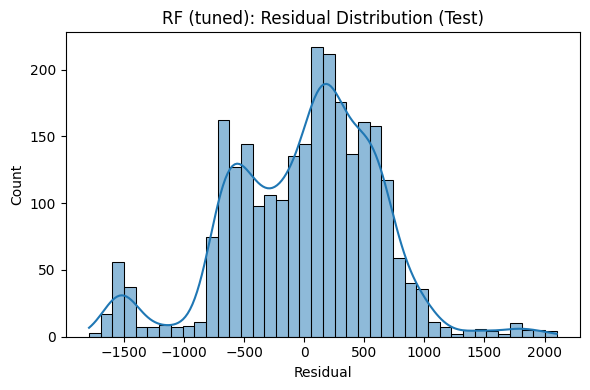


XGB (tuned) metrics
  R2_train: 0.685033
   R2_test: 0.668482
  MAE_test: 485.429048
 RMSE_test: 615.932653
 MAPE_test: 0.187422


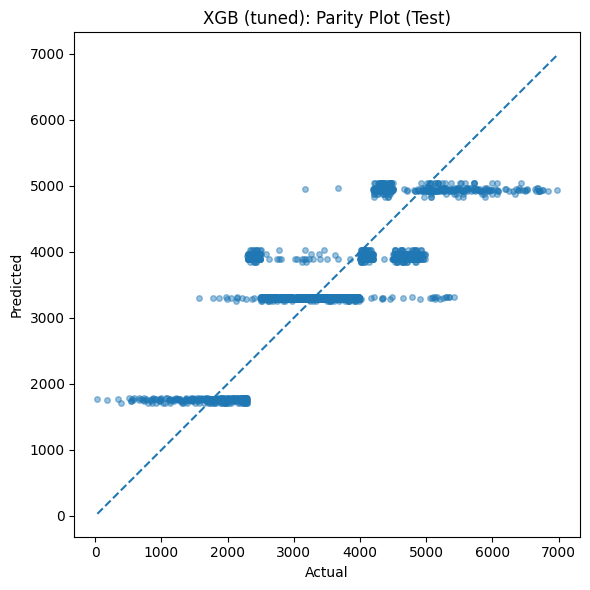

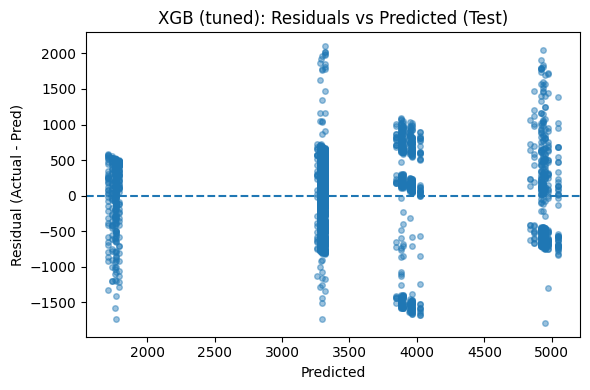

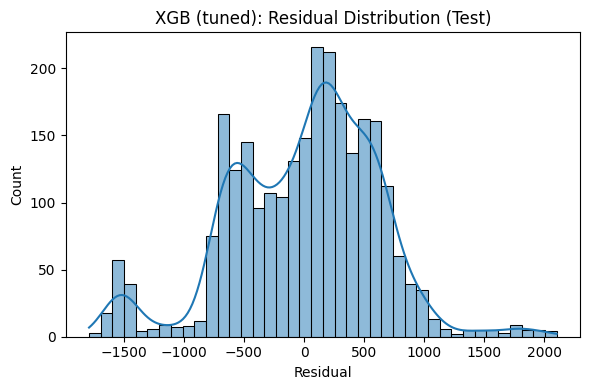

In [93]:
RANDOM_STATE = 1

# ----------------------------
# 1) Build base pipelines
# ----------------------------
def make_rf_base(preprocessor):
    """Preprocessor → RandomForest pipeline (base)."""
    rf = RandomForestRegressor(random_state=RANDOM_STATE)
    return make_pipeline(preprocessor, rf)


def make_xgb_base(preprocessor, use_gpu=False):
    """Preprocessor → XGBRegressor pipeline (base)."""
    tree_method = "gpu_hist" if use_gpu else "hist"
    predictor   = "gpu_predictor" if use_gpu else "auto"
    n_jobs      = 1 if use_gpu else -1

    xgb = XGBRegressor(
        random_state=RANDOM_STATE,
        objective="reg:squarederror",
        tree_method=tree_method,
        predictor=predictor,
        n_jobs=n_jobs,
        verbosity=0,
    )
    return make_pipeline(preprocessor, xgb)


# ----------------------------
# 2) Tune with compact grids
# ----------------------------
def tune_rf(pipe, X, y, cv=3, n_jobs=-1, verbose=1):
    """GridSearchCV for RF pipeline."""
    grid = {
        "randomforestregressor__n_estimators": [200, 400],
        "randomforestregressor__max_depth": [None, 10],
        "randomforestregressor__max_features": ["sqrt", 0.5],

    }
    gs = GridSearchCV(pipe, grid, scoring="r2", cv=cv, n_jobs=n_jobs, verbose=verbose)
    gs.fit(X, y)
    return gs.best_estimator_, gs.best_params_, gs.best_score_


def tune_xgb(pipe, X, y, cv=3, n_jobs=1, verbose=1):
    """GridSearchCV for XGB pipeline (keep n_jobs low if using GPU)."""
    grid = {
        "xgbregressor__n_estimators": [400, 800],
        "xgbregressor__max_depth": [4, 6],
        "xgbregressor__learning_rate": [0.05, 0.1],
        "xgbregressor__min_child_weight": [1, 3],
        "xgbregressor__subsample": [0.8, 1.0],
        "xgbregressor__colsample_bytree": [0.8, 1.0],
    }
    gs = GridSearchCV(pipe, grid, scoring="r2", cv=cv, n_jobs=n_jobs, verbose=verbose)
    gs.fit(X, y)
    return gs.best_estimator_, gs.best_params_, gs.best_score_


# -----------------------------------------
# 3) Evaluate + diagnostic plots (reusable)
# -----------------------------------------
def evaluate_and_plot(model, X_tr, y_tr, X_te, y_te, title_prefix="Model"):
    # Fit if not already fitted (safe if it is)
    try:
        # will raise if not fitted; if so, fit now
        _ = model.predict(X_tr[:2])
    except Exception:
        model.fit(X_tr, y_tr)

    # Predictions
    ytr_pred = model.predict(X_tr)
    yte_pred = model.predict(X_te)

    # Metrics (train)
    mse_tr  = mean_squared_error(y_tr, ytr_pred)
    rmse_tr = np.sqrt(mse_tr)
    mape_tr = mean_absolute_percentage_error(y_tr, ytr_pred)

    # Metrics (test)
    mse_te  = mean_squared_error(y_te, yte_pred)
    rmse_te = np.sqrt(mse_te)
    mape_te = mean_absolute_percentage_error(y_te, yte_pred)

    metrics = {
        "R2_train": r2_score(y_tr, ytr_pred),
        "MAE_train": mean_absolute_error(y_tr, ytr_pred),
        "MSE_train": mse_tr,
        "RMSE_train": rmse_tr,
        "MAPE_train": mape_tr,

        "R2_test": r2_score(y_te, yte_pred),
        "MAE_test": mean_absolute_error(y_te, yte_pred),
        "MSE_test": mse_te,
        "RMSE_test": rmse_te,
        "MAPE_test": mape_te,
    }

    # Pretty print
    print(f"\n{title_prefix} metrics")
    for k in ["R2_train","R2_test","MAE_test","RMSE_test","MAPE_test"]:
        print(f"{k:>10}: {metrics[k]:.6f}")

    # ---- Parity (Actual vs Predicted) ----
    plt.figure(figsize=(6,6))
    plt.scatter(y_te, yte_pred, alpha=0.45, s=16)
    lims = [min(y_te.min(), yte_pred.min()), max(y_te.max(), yte_pred.max())]
    plt.plot(lims, lims, linestyle="--")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{title_prefix}: Parity Plot (Test)")
    plt.tight_layout()
    plt.show()

    # ---- Residuals vs Predicted ----
    residuals = y_te - yte_pred
    plt.figure(figsize=(6,4))
    plt.scatter(yte_pred, residuals, alpha=0.45, s=16)
    plt.axhline(0, linestyle="--")
    plt.xlabel("Predicted")
    plt.ylabel("Residual (Actual - Pred)")
    plt.title(f"{title_prefix}: Residuals vs Predicted (Test)")
    plt.tight_layout()
    plt.show()

    # ---- Residuals distribution ----
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, bins=40, kde=True)
    plt.title(f"{title_prefix}: Residual Distribution (Test)")
    plt.xlabel("Residual")
    plt.tight_layout()
    plt.show()

    return metrics


# ==========================================
# 4) Build, tune, evaluate all four models
# ==========================================
results = {}

# --- Base models ---
rf_base  = make_rf_base(preprocessor)
xgb_base = make_xgb_base(preprocessor, use_gpu=False)   # set True if using GPU

rf_base.fit(X_train, y_train)
xgb_base.fit(X_train, y_train)

results["RF (base)"]  = evaluate_and_plot(rf_base,  X_train, y_train, X_test, y_test, "RF (base)")
results["XGB (base)"] = evaluate_and_plot(xgb_base, X_train, y_train, X_test, y_test, "XGB (base)")

# --- Tuned models ---
rf_pipe_for_tune  = clone(rf_base)   # safe copy
xgb_pipe_for_tune = clone(xgb_base)  # safe copy

rf_tuned, rf_params, rf_cv = tune_rf(rf_pipe_for_tune, X_train, y_train, cv=3, n_jobs=-1, verbose=1)
xgb_tuned, xgb_params, xgb_cv = tune_xgb(xgb_pipe_for_tune, X_train, y_train, cv=3, n_jobs=1, verbose=1)

print("\nBest RF params:", rf_params, "CV R^2:", round(rf_cv, 4))
print("Best XGB params:", xgb_params, "CV R^2:", round(xgb_cv, 4))

results["RF (tuned)"]  = evaluate_and_plot(rf_tuned,  X_train, y_train, X_test, y_test, "RF (tuned)")
results["XGB (tuned)"] = evaluate_and_plot(xgb_tuned, X_train, y_train, X_test, y_test, "XGB (tuned)")



**Comment:**

### Random Forest — tuned

* **Train fit:** R² **0.6850**.
* **Test fit:** R² **0.6685** (Adj. ~0.667), **RMSE ~615.89**, **MAE ~485.42**, **MAPE ~18.74%**.
* **Gap (test − train):** ΔR² ≈ **−0.0165** → **minimal overfitting**; errors rise only slightly OOS.

### XGBoost — tuned

* **Train fit:** R² **0.6850**.
* **Test fit:** R² **0.6685** (Adj. ~0.667), **RMSE ~615.93**, **MAE ~485.43**, **MAPE ~18.74%**.
* **Gap (test − train):** ΔR² ≈ **−0.0166** → **minimal overfitting**; profile mirrors RF.

### RF vs XGB (tuned, test set)

* **Virtually a tie.**

  * R²: **0.66853 (RF)** vs **0.66848 (XGB)**
  * RMSE: **615.89 (RF)** vs **615.93 (XGB)** → RF better by ~**0.04**
  * MAE: **485.42 (RF)** vs **485.43 (XGB)** → XGB worse by ~**0.01**
  * MAPE: both **~18.74%**.

### Base vs tuned (test set)

* **Random Forest:** R² **0.66851 → 0.66853**, RMSE **615.91 → 615.89**, MAE **485.31 → 485.42** (negligible changes).
* **XGBoost:** R² **0.66848 → 0.66848**, RMSE **615.93 → 615.93**, MAE **485.43 → 485.43** (no practical change).
* **Takeaway:** Tuning barely moves the needle; both models are already near the dataset’s ceiling under this setup.

### Best found hyperparameters from the metric runs

* **RF:** `max_depth=None`, `max_features='sqrt'`, `n_estimators=400` (CV R² ≈ **0.6813**).
* **XGB:** `learning_rate=0.05`, `max_depth=4`, `min_child_weight=1`, `n_estimators=400`, `subsample=1.0`, `colsample_bytree=1.0` (CV R² ≈ **0.6813**).

### Training Performance Metrics Comparison

In [94]:
# Compare training performance across models (RF base/tuned, XGB base/tuned)
models_train_comp_df = pd.concat(
    [
        rf_estimator_model_train_perf.T,     # RF base
        rf_tuned_model_train_perf.T,         # RF tuned
        xgb_estimator_model_train_perf.T,    # XGB base
        xgb_tuned_model_train_perf.T,        # XGB tuned
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest",
    "Random Forest (Tuned)",
    "XGBoost",
    "XGBoost (Tuned)"
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Random Forest,Random Forest (Tuned),XGBoost,XGBoost (Tuned)
RMSE,596.994959,597.069233,596.978222,596.995480
MAE,468.875850,469.997526,468.965507,468.596534
R-squared,0.685016,0.684937,0.685033,0.685015
Adj. R-squared,0.684501,0.684423,0.684519,0.684501
MAPE,0.165674,0.165943,0.165690,0.165647


**Comment:**

* **All four models fit the training data essentially the same.**
  R² ≈ **0.685** (Adj. R² ≈ **0.6845**) across the board → ~**68.5%** of variance explained on train for every model.

* **Tuning changed little on train.**
  Deltas vs. base are in the 3rd–4th decimal place → differences are within noise; no real gain in in-sample fit from tuning.

* **Tiny ranking (train):**

  * **Lowest RMSE:** *XGBoost (base)* **596.98** (ties within ~0.1).
  * **Lowest MAE:** *XGBoost (tuned)* **468.60** (differences ≤ ~1.4).
  * **Lowest MAPE:** *XGBoost (tuned)* **16.56%** vs others **16.57–16.59%** → effectively identical.

* **Takeaway:**
  RF and XGB have **very similar capacity** on this feature set; hyperparameter tweaks don’t improve the **in-sample** fit. Any choice should be based on **validation/test** results, compute cost, and operational preferences.


### Test Performance Metrics Comparison

In [95]:
# training performance comparison  (these are TEST metrics)
models_train_comp_df = pd.concat(
    [
        rf_estimator_model_test_perf.T,   # RF base (test)
        rf_tuned_model_test_perf.T,       # RF tuned (test)
        xgb_estimator_model_test_perf.T,  # XGB base (test)
        xgb_tuned_model_test_perf.T,      # XGB tuned (test)
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest",
    "Random Forest (Tuned)",
    "XGBoost",
    "XGBoost (Tuned)"
]

print("Test performance comparison:")  # (label says 'training' above, but these are test metrics)
models_train_comp_df


Test performance comparison:


,Random Forest,Random Forest (Tuned),XGBoost,XGBoost (Tuned)
RMSE,615.906846,615.701436,615.933034,615.956297
MAE,485.311027,486.190741,485.429585,485.054711
R-squared,0.668510,0.668731,0.668482,0.668457
Adj. R-squared,0.667244,0.667466,0.667215,0.667190
MAPE,0.187394,0.187587,0.187421,0.187393


**Comment:**
* **Overall fit (test):** All models land at **R² ≈ 0.668–0.669** (Adj. R² ≈ **0.667**). In practice, they explain the **same ~66–67%** of variance on unseen data.

* **Errors are almost identical across models.**

  * **RMSE (↓):** RF (tuned) **615.70** ⟨best⟩ · RF **615.91** · XGB **615.93** · XGB (tuned) **615.96** → spread **< 0.3**.
  * **MAE (↓):** XGB (tuned) **≈ 485.05** ⟨best⟩ · XGB **≈ 485.43** · RF **≈ 485.31** · RF (tuned) **≈ 486.19** → differences **≤ ~1.1–1.2**.
  * **MAPE (↓):** all **≈ 18.7%** (best by a hair: XGB-tuned or RF base; gap **≤ 0.02 pp**).

* **Which one “wins”?**

  * **R² / RMSE:** *Random Forest (tuned)* leads by a **hair**.
  * **MAE / MAPE:** *XGBoost (tuned)* edges out by a **hair**.
  * Net: **statistical tie**; gaps are within typical noise.

* **Effect of tuning:** Very small. RF tuning trims RMSE slightly but nudges MAE/MAPE up a touch; XGB tuning nudges MAE/MAPE down a touch with negligible R² change. No material change in generalization.

* **Model Recommendation:**

  * **RF (tuned)** and **XGB (tuned)** perform almost identically across metrics.
  * Given this tie, I recommend **RF (tuned)** for its simplicity, CPU efficiency, and ease of use.
  * **XGB (tuned)** is still a solid option if GPU execution is specifically desired, but the edge is minimal.


### Set Up Directory and File Path for Model Serialization

In [96]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("backend_files", exist_ok=True)

In [97]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "backend_files/final_model.joblib"

In [98]:
# --- Final selection from the test comparison: Random Forest (Tuned) ---
# Export Final Model Pipeline for Deployment
best_model = rf_tuned   # pipeline returned by GridSearchCV for RF

joblib.dump(best_model, saved_model_path, compress=3)
print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/final_model.joblib


In [99]:
# Load the saved model pipeline from the file
saved_model = joblib.load("backend_files/final_model.joblib") #Complete the code to define the name of the saved model

# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


Let's try making predictions on the test set using the deserialized model.

- Please ensure that the saved model is loaded before making predictions.

In [100]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=400,
                                       random_state=1))])

- As we can see, the model can be directly used for making predictions without any retraining.

# **Deployment - Backend**

## Flask Web Framework


In [101]:
%%writefile backend_files/app.py
import joblib
import pandas as pd
from flask import Flask, request, jsonify

# Flask app
superkart_api = Flask(__name__)

# Load the trained pipeline (preprocessor + model)
model = joblib.load("final_model.joblib")

@superkart_api.get("/")
def home():
    return "SuperKart Sales Forecast API is running."

@superkart_api.get("/health")
def health():
    return jsonify(status="ok"), 200

@superkart_api.post("/v1/predict")
def predict_sales():
    try:
        data = request.get_json(force=True)

        sample = {
            "Product_Weight": data["Product_Weight"],
            "Product_Sugar_Content": data["Product_Sugar_Content"],
            "Product_Allocated_Area": data["Product_Allocated_Area"],
            "Product_MRP": data["Product_MRP"],
            "Store_Size": data["Store_Size"],
            "Store_Location_City_Type": data["Store_Location_City_Type"],
            "Store_Type": data["Store_Type"],
            "Product_Id_char": data["Product_Id_char"],
            "Store_Age_Years": data["Store_Age_Years"],
            "Product_Type_Category": data["Product_Type_Category"],
        }

        input_df = pd.DataFrame([sample])
        prediction = model.predict(input_df).tolist()[0]
        return jsonify({"Sales": float(prediction)})
    except KeyError as e:
        return jsonify(error=f"Missing key: {e}"), 400
    except Exception as e:
        return jsonify(error=str(e)), 500

if __name__ == "__main__":
    superkart_api.run(debug=True)


Writing backend_files/app.py


* Flask inference API that loads the saved **pipeline** (`final_model.joblib`) and serves predictions.
* Endpoints: `GET /` & `/health`; `POST /v1/predict` expects one record with the trained feature keys and returns `{"Sales": <float>}`.

## Dependencies File

In [102]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scipy==1.14.1
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2
fastapi==0.115.0

Writing backend_files/requirements.txt


* `requirements.txt` pins the backend environment (install with `pip install -r backend_files/requirements.txt`) so Spaces/servers recreate the exact libs.

## Dockerfile

In [103]:
%%writefile backend_files/Dockerfile
FROM python:3.11-slim

# Set the working directory
WORKDIR /app

# Copy files
COPY . .

# Install dependencies
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Start the app with Gunicorn
# Replace "app:superkart_api" with the correct module:instance
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:superkart_api"]


Writing backend_files/Dockerfile


* Dockerfile
  * Builds a slim Python 3.11 image, copies code to `/app`, installs deps, then serves the Flask API with **gunicorn**.
  * Bind to the Space port: `gunicorn -w 4 -b 0.0.0.0:${PORT:-7860} app:superkart_api` (module:instance must match `app.py` & `superkart_api`).
  * Ensure `final_model.joblib` is in the image (copied with the code).


## Setting up a Hugging Face Docker Space for the Backend

In [104]:
# Token stored in an env var
os.environ["HF_TOKEN"] = getpass("Enter your Hugging Face token: ")

# Login using the env var
login(token=os.environ["HF_TOKEN"])

Enter your Hugging Face token: ··········


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [105]:
# Create the Space and upload backend_files to Hugging Face
from huggingface_hub import create_repo, HfApi
repo_id = "d1diamonds/superkart-backend"

create_repo(repo_id, repo_type="space", space_sdk="docker", exist_ok=True)
HfApi().upload_folder(folder_path="backend_files", repo_id=repo_id, repo_type="space",
                      commit_message="Upload backend")


Uploading...:   0%|          | 0.00/551k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/d1diamonds/superkart-backend/commit/0c78a723b15ce78c6752d634fcd47fbcab2db921', commit_message='Upload backend', commit_description='', oid='0c78a723b15ce78c6752d634fcd47fbcab2db921', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/d1diamonds/superkart-backend', endpoint='https://huggingface.co', repo_type='space', repo_id='d1diamonds/superkart-backend'), pr_revision=None, pr_num=None)

In [106]:
# Create the Hugging Face Space repo for superkart-backend
try:
    create_repo(
        "d1diamonds/superkart-backend",
        repo_type="space",
        space_sdk="docker",
        private=False
    )
except Exception as e:
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-697e5d9d-3e1dc8d94f72fd245080ce11;48df66c0-05d1-461b-8da2-c4b7ab2e07bb)

You already created this space repo: d1diamonds/superkart-backend


In [107]:
# Quick sanity check of the Space runtime root endpoint (GET /)
url = "https://d1diamonds-superkart-backend.hf.space/"

try:
    response = requests.get(url)
    print("Status Code:", response.status_code)
    print("Response Text:", response.text[:500])  # print only first 500 chars
except Exception as e:
    print("Error:", e)

Status Code: 200
Response Text: SuperKart Sales Forecast API is running.


## Uploading Files to Hugging Face Space (Docker Space)

In [108]:
# Token from env
token = os.environ.get("HF_TOKEN")
if not token:
    raise RuntimeError("HF_TOKEN is not set. Please set it in your environment.")

# Repo id
repo_id = "d1diamonds/superkart-backend"

# Ensure Space exists (Docker SDK)
create_repo(repo_id=repo_id, repo_type="space", space_sdk="docker", exist_ok=True, token=token)

# Force a rebuild by touching a stamp file
with open("backend_files/.rebuild_stamp", "w") as f:
    f.write(datetime.now(timezone.utc).isoformat())

# Upload (commit triggers build)
api = HfApi()
api.upload_folder(
    folder_path="backend_files",
    path_in_repo=".",            # put files at repo root (optional but tidy)
    repo_id=repo_id,
    repo_type="space",
    commit_message="Force rebuild: " + datetime.now(timezone.utc).isoformat(),
    token=token,
)

Uploading...:   0%|          | 0.00/551k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/d1diamonds/superkart-backend/commit/8f645f448bb1f8d0a7b6d68936be8d90c68ca04c', commit_message='Force rebuild: 2026-01-31T19:53:02.157137+00:00', commit_description='', oid='8f645f448bb1f8d0a7b6d68936be8d90c68ca04c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/d1diamonds/superkart-backend', endpoint='https://huggingface.co', repo_type='space', repo_id='d1diamonds/superkart-backend'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

- I created a Streamlit space called ***Sales-Predictor*** on Hugging Face.

## Streamlit for Interactive UI

In [109]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [110]:
%%writefile frontend_files/app.py

import streamlit as st
import requests

st.title("SuperKart Sales Forecast")

# Input fields for product and store data
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=12.66)
Product_Sugar_Content = st.selectbox("Product Sugar Content", ["Low Sugar", "Regular", "No Sugar"])
Product_Allocated_Area = st.number_input("Product Allocated Area (0–1)", min_value=0.0, max_value=1.0, value=0.012, step=0.001)
Product_MRP = st.number_input("Product MRP", min_value=0.0, value=142.0)
Store_Size = st.selectbox("Store Size", ["Low", "Medium", "High"])
Store_Location_City_Type = st.selectbox("Store Location City Type", ["Tier 1", "Tier 2", "Tier 3"])
Store_Type = st.selectbox("Store Type", ["Departmental Store", "Supermarket Type 1", "Supermarket Type 2", "Food Mart"])
Product_Id_char = st.text_input("Product ID Prefix (e.g., DR, NC)", value="DR")
Store_Age_Years = st.number_input("Store Age (Years)", min_value=0, value=7, step=1)
Product_Type_Category = st.selectbox(
    "Product Type Category",
    [
        "Meat", "Snack Foods", "Hard Drinks", "Dairy", "Canned", "Soft Drinks",
        "Health and Hygiene", "Baking Goods", "Bread", "Breakfast", "Frozen Foods",
        "Fruits and Vegetables", "Household", "Seafood", "Starchy Foods", "Others"
    ]
)

product_data = {
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_MRP": Product_MRP,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
    "Product_Id_char": Product_Id_char,
    "Store_Age_Years": Store_Age_Years,
    "Product_Type_Category": Product_Type_Category
}

if st.button("Predict", type='primary'):
    response = requests.post(
        "https://d1diamonds-superkart-backend.hf.space/v1/predict",  # runtime URL of the HF Space
        json=product_data,
        timeout=20
    )
    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Sales"]
        st.write(f"Predicted Product Store Sales Total: ${predicted_sales:.2f}")
    else:
        st.error(f"Error in API request (status {response.status_code})")


Writing frontend_files/app.py


* Streamlit UI collects all model features, sends them as JSON to the backend **/v1/predict**, and displays the predicted sales formatted as `$…` on click.


## Dependencies File

In [111]:
%%writefile frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Writing frontend_files/requirements.txt


- Frontend dependencies for the Streamlit app

## DockerFile

In [112]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.11 installed
FROM python:3.11-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


- Dockerfile for Streamlit frontend (binds to HF $PORT)

## Uploading Files to Hugging Face Space (Streamlit Space)

In [113]:
access_key = os.environ["HF_TOKEN"]             # read token from environment
repo_id = "d1diamonds/Sales-Predictor"

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="frontend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/d1diamonds/Sales-Predictor/commit/86aa2ca4f9f56e905f69921ebd5f03f27d67ac66', commit_message='Upload folder using huggingface_hub', commit_description='', oid='86aa2ca4f9f56e905f69921ebd5f03f27d67ac66', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/d1diamonds/Sales-Predictor', endpoint='https://huggingface.co', repo_type='space', repo_id='d1diamonds/Sales-Predictor'), pr_revision=None, pr_num=None)

# **Links for Front-end and Back-end Deployment**


* **Frontend (Streamlit UI):**
  https://d1diamonds-sales-predictor.hf.space/


* **Backend (API base):**
  https://d1diamonds-superkart-backend.hf.space/

  **API endpoints:**

  * Health: https://d1diamonds-superkart-backend.hf.space/health


# **Actionable Insights and Business Recommendations**

## **Actionable Insights**

* **Where revenue comes from**

  * **Categories:** *Fruits & Vegetables* and *Snack Foods* contribute the biggest revenue blocks (each ≈ multi-million range).
  * **Sugar segment:** **Low Sugar** SKUs dominate both volume and revenue; **No Sugar** is concentrated almost entirely in *Household* and *Health & Hygiene*.
  * **Stores:** **OUT004** is the clear top earner (≈ 15.4M revenue); **OUT002** is the weakest (≈ 2.0M).
  * **Footprint mix:** The network is skewed to **Medium** stores (≈ 69%) in **Tier-2** cities (≈ 72%), with **Supermarket Type-2** the dominant format (≈ 53%). These same segments also lead total revenue.
* **Drivers & relationships**

  * **MRP** and **Product_Weight** show the strongest positive correlations with revenue (both ~0.75–0.80). This is expected because revenue scales with price and larger/premium packs.
  * **Store age:** Slight negative correlation with establishment year (older stores, higher sales) → maturity and local loyalty likely matter.
  * **Allocated area:** Right-skewed distribution with many small shares; outliers indicate a few SKUs get very large space.
* **Model performance to plan with**

  * **Generalization:** Test **R² ≈ 0.669**; **MAPE ≈ 18.7%**; **RMSE ≈ 616**. RF and XGB perform **virtually identically** with minimal overfitting.
  * **Implication:** Use forecasts with a **category/store safety buffer of ~20%** by default, tuning buffers by SKU class and store.


## **Business Recommendations**

* **Inventory & Replenishment**

  * **Bias stock** toward *Fruits & Vegetables* and *Snack Foods* in **Tier-2, Medium, Supermarket Type-2** stores; raise safety stock by **MAPE-based buffers (≈ 20%)** for high-volatility SKUs.
  * **De-risk low performers** (e.g., **OUT002**, *Small*, *Tier-3*): shorten lead times, lower min-stock, and favor top decile SKUs only.
* **Assortment & Space**

  * **Expand shelf space** for proven high-velocity items (top 10–20% SKUs by contribution) and **trim tail SKUs** with low turns; use **space tests** to quantify lift from increased *Product_Allocated_Area*.
  * **Replicate OUT004’s planogram** and best practices to similar stores (same size/tier/type).
* **Pricing & Promotions**

  * Because **MRP** strongly co-moves with revenue, run **price elasticity tests** by category to separate price effects from mix; protect margin on premium packs but pair price points with **targeted promos** for entry packs.
  * Promote **Low/No Sugar** lines (health halo) in urban and family-heavy catchments; cross-merch with *Health & Hygiene*.
* **Network & Growth**

  * **Prioritize expansion** in **Tier-2, Medium, Supermarket Type-2** footprints; that is the company’s “sweet spot.”
  * For **Tier-3/Small/Food Mart**, consider **SKU rationalization** and community-specific assortments rather than blanket expansion.
* **S&OP Integration**

  * **Forecast cadence:** weekly refresh; **retrain monthly/quarterly**.
  * **KPIs to monitor:** MAPE by *store × category*, service level (% OOS), and inventory turns; adjust safety buffers where MAPE persistently >20%.
  * **Exception handling:** flag stores/SKUs with **large residuals** (forecast errors) for manual review (events, local promos, supply issues).